In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import sys
!{sys.executable} -m pip install pandas-profiling

import itertools

import scipy

import pandas_profiling

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer


from kmodes.kmodes import KModes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport




In [3]:
df = pd.read_csv("C:/RAHIM\MMA -QUEEN'S/Machine Learning & A.I. - MMA 869/Assignment/jewelry_customers.csv")
%config IPCompleter.greedy=True

In [4]:
#Data Exploration
#Age
df['Age'].describe()

count    505.000000
mean      59.019802
std       24.140043
min       17.000000
25%       34.000000
50%       59.000000
75%       85.000000
max       97.000000
Name: Age, dtype: float64

In [5]:
#Income
df['Income'].describe()

count       505.000000
mean      75513.291089
std       35992.922184
min       12000.000000
25%       34529.000000
50%       75078.000000
75%      107100.000000
max      142000.000000
Name: Income, dtype: float64

In [6]:
#Savings
df['Savings'].describe()

count      505.000000
mean     11862.455867
std       4949.229253
min          0.000000
25%       6828.709702
50%      14209.932800
75%      16047.268330
max      20000.000000
Name: Savings, dtype: float64

In [7]:
#SpendingScore
df['SpendingScore'].describe()

count    505.000000
mean       0.505083
std        0.259634
min        0.000000
25%        0.304792
50%        0.368215
75%        0.768279
max        1.000000
Name: SpendingScore, dtype: float64

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


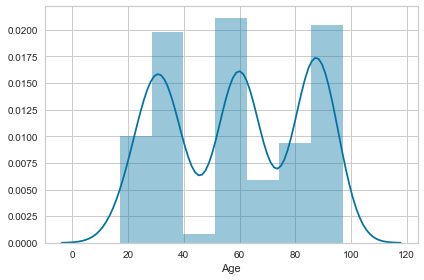

In [8]:
#histogram of all four attributes
sns.distplot(df['Age']);

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


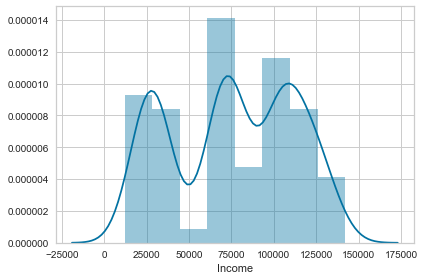

In [9]:
#Income
sns.distplot(df['Income']);

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


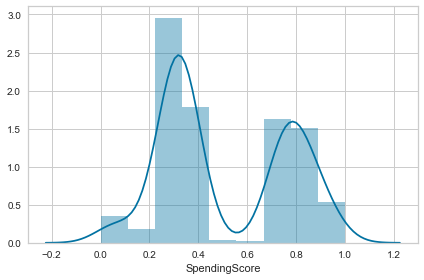

In [10]:
#SpendingScore
sns.distplot(df['SpendingScore']);

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


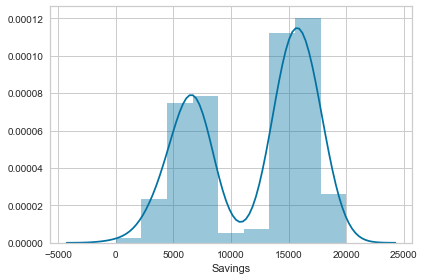

In [11]:
#Savings
sns.distplot(df['Savings']);

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


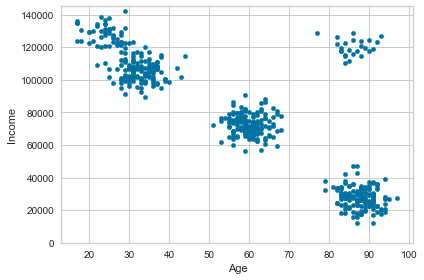

In [12]:
#Relationship with numerical attributes
#scatter plot Age/Income
var = 'Age'
data = pd.concat([df['Income'], df[var]], axis=1)
data.plot.scatter(x=var, y='Income', ylim=(0,145000));
# It gives us a good idea and distribution of age and Income

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


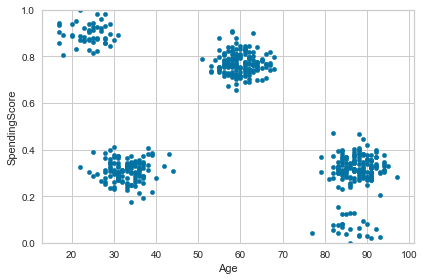

In [13]:
#Relationship with numerical attributes
#scatter plot Age/SpendingScore
var = 'Age'
data = pd.concat([df['SpendingScore'], df[var]], axis=1)
data.plot.scatter(x=var, y='SpendingScore', ylim=(0,1));
# It gives us a good idea and distribution of age and SpendingScore.

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


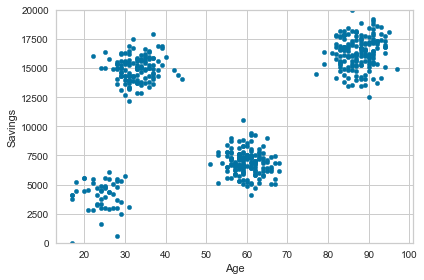

In [14]:
#Relationship with numerical attributes
#scatter plot Age/Savings
var = 'Age'
data = pd.concat([df['Savings'], df[var]], axis=1)
data.plot.scatter(x=var, y='Savings', ylim=(0,20000));
# It gives us a good idea and distribution of age and Savings.

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


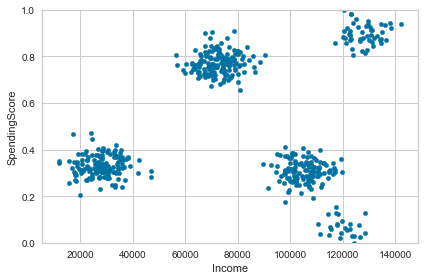

In [15]:
#Relationship with numerical attributes
#scatter plot Income/SpendingScore
var = 'Income'
data = pd.concat([df['SpendingScore'], df[var]], axis=1)
data.plot.scatter(x=var, y='SpendingScore', ylim=(0,1));
# It gives us a good idea and distribution of Income and SpendingScore.

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


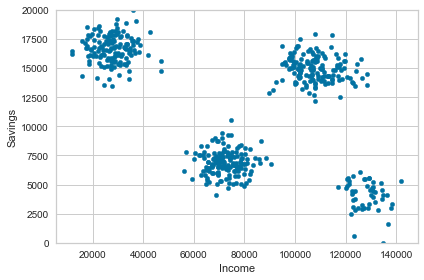

In [16]:
#Relationship with numerical attributes
#scatter plot Income/Savings
var = 'Income'
data = pd.concat([df['Savings'], df[var]], axis=1)
data.plot.scatter(x=var, y='Savings', ylim=(0,20000));
# It gives us a good idea and distribution of Income and Savings.

C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


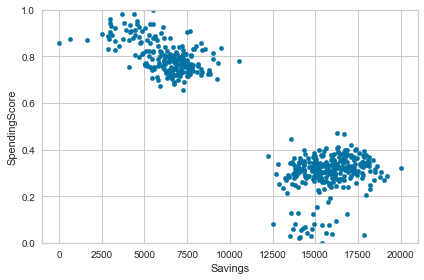

In [17]:
#Relationship with numerical attributes
#scatter plot SpendingScore/Savings
var = 'Savings'
data = pd.concat([df['SpendingScore'], df[var]], axis=1)
data.plot.scatter(x=var, y='SpendingScore', ylim=(0,1));
# It gives us a good idea and distribution of SpendingScore and Savings.

In [18]:
#correlation matrix
df.profile_report()


In [43]:
#K-Means
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10, random_state=42)
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [44]:
k_means.labels_

array([2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1,
       2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2,

In [45]:
# Let's look at the centers
k_means.cluster_centers_

array([[3.73165829e+01, 1.12977769e+05, 4.27282030e-01, 1.22309820e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.95974843e+01, 7.26749623e+04, 7.65433878e-01, 6.96643626e+03]])

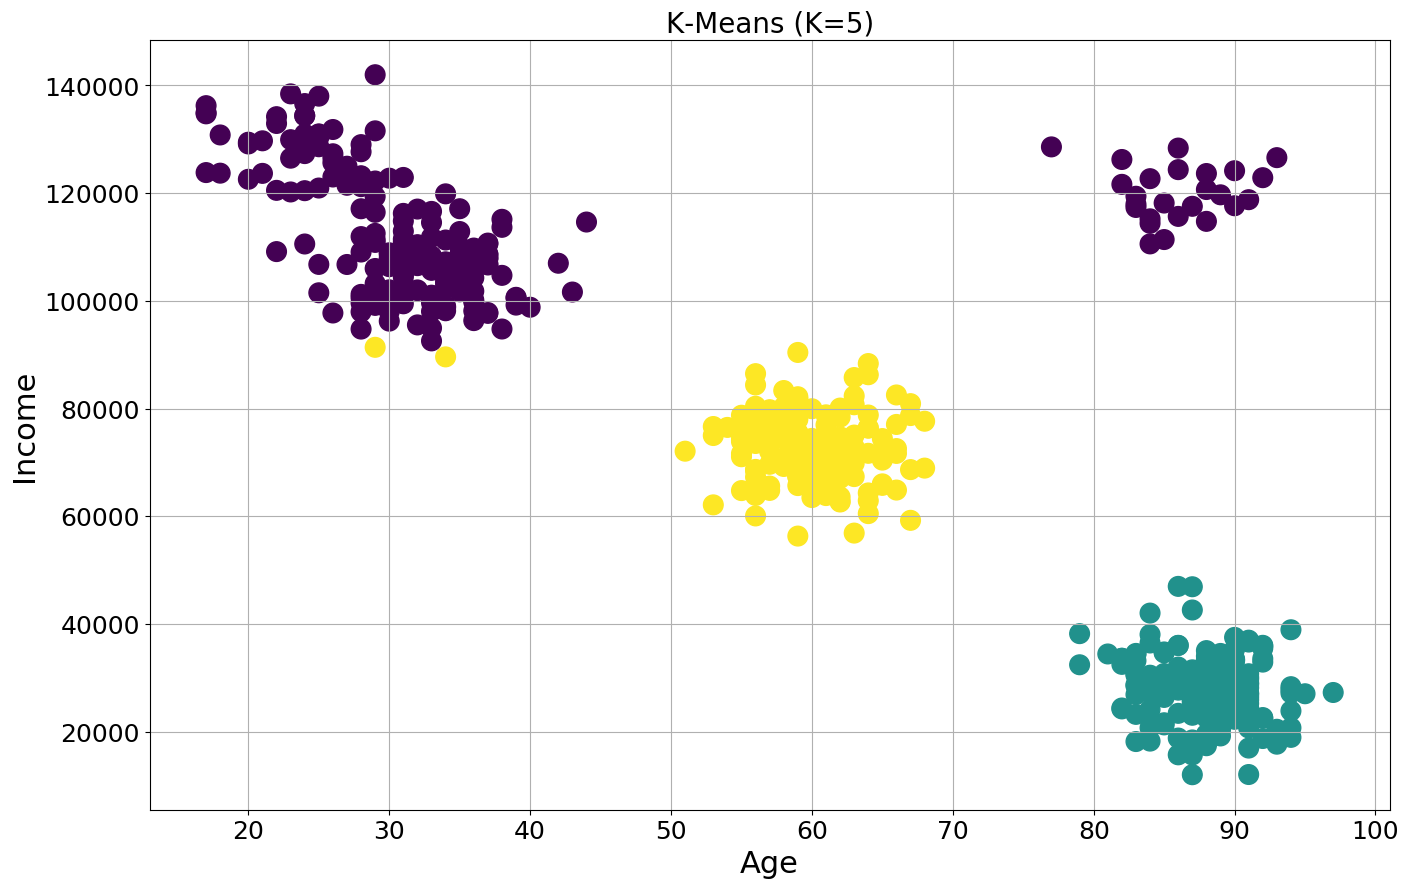

In [46]:
#Plot the Clusters
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

sc = plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=200, c=k_means.labels_);

#plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")
plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);



In [47]:
#Internal Validation Metrics
# WCSS == Inertia
k_means.inertia_

43729705197.748924

In [48]:
silhouette_score(df, k_means.labels_)

0.7393168523289475

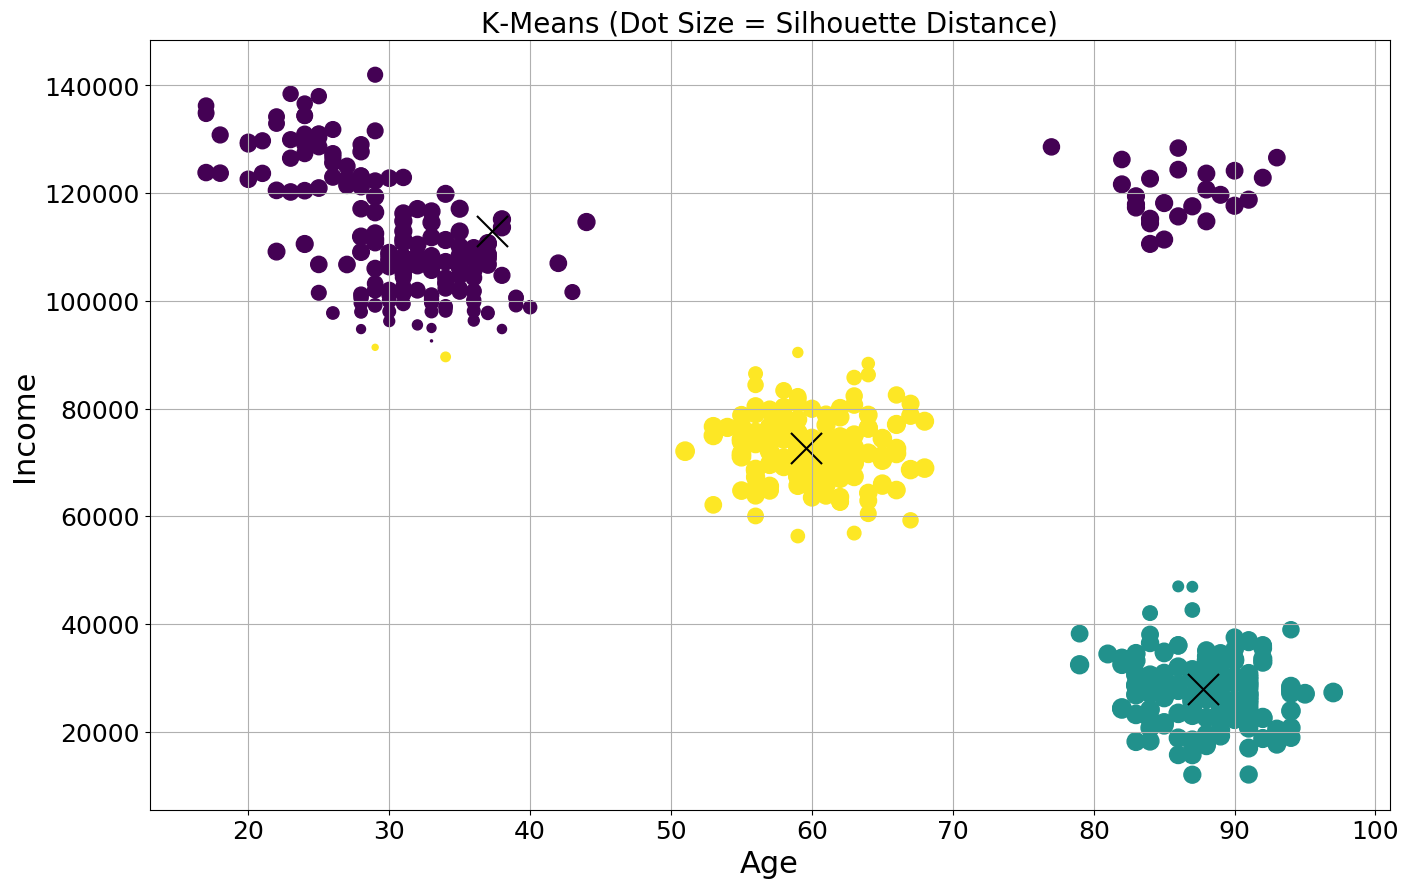

In [49]:
plt.style.use('default');

sample_silhouette_values = silhouette_samples(df, k_means.labels_)
sizes = 200*sample_silhouette_values

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

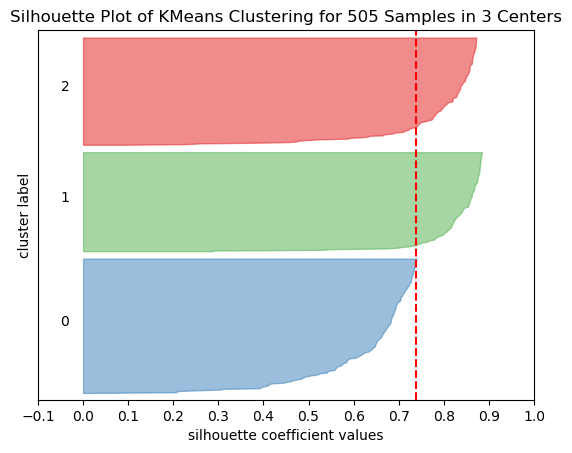

In [50]:
#sklearn.metrics.davies_bouldin_score(X, k_means.labels_)
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(df)
visualizer.poof()
fig = visualizer.ax.get_figure()
fig.savefig('AirSimClient.write_file-py1.png'.format(k_means.n_clusters), transparent=False);


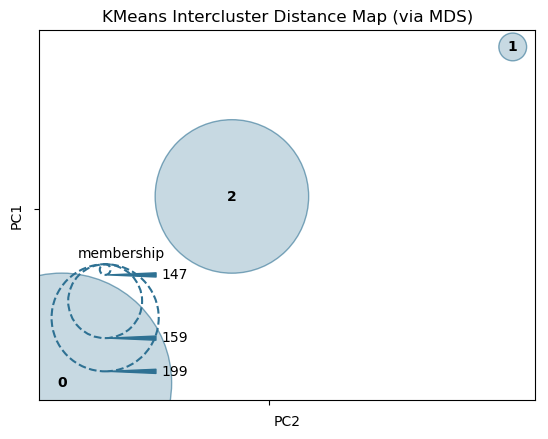

<Figure size 640x480 with 0 Axes>

In [51]:
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(k_means)

visualizer.fit(df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data
plt.savefig('AirSimClient.write_file-py1.png', transparent=False);

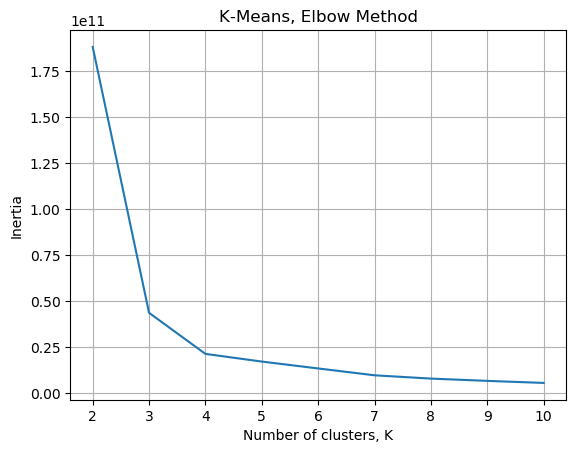

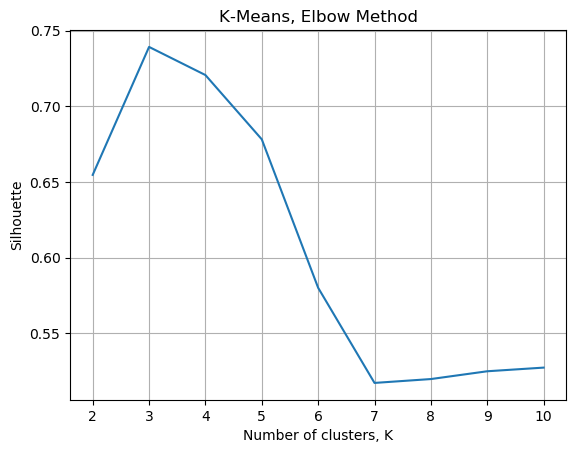

In [52]:
# Elbow Method (Manual)
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(df)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(df, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
plt.savefig('AirSimClient.write_file-py1.png');


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
plt.savefig('AirSimClient.write_file-py1.png');

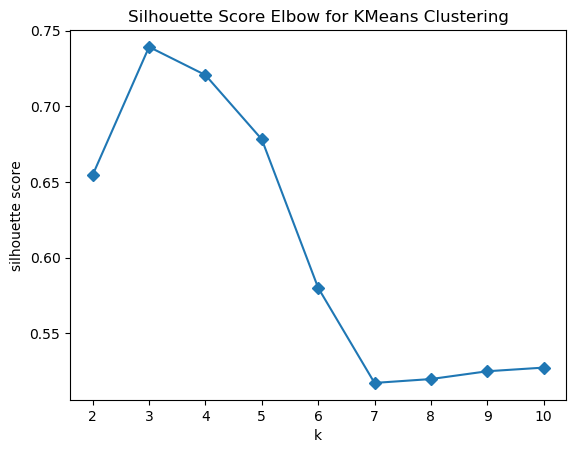

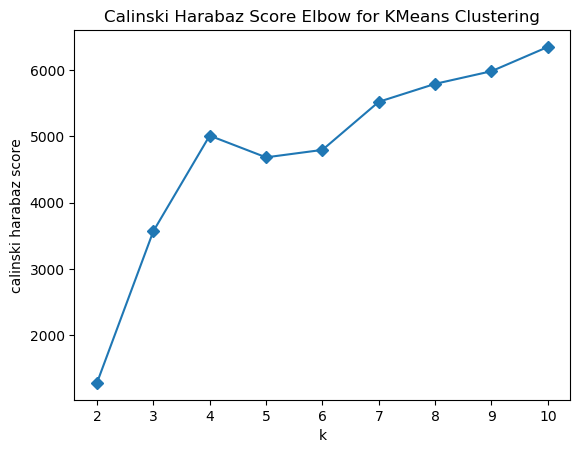

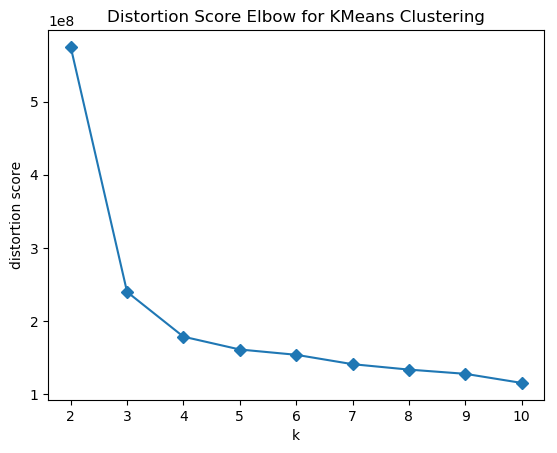

In [53]:
#Elbow Method (Using Yellowbrick Package)
model = KMeans(init='k-means++', n_init=10, max_iter=1000, random_state=42)
KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False).fit(df).poof();
KElbowVisualizer(model, k=(2,11), metric='calinski_harabaz', timings=False).fit(df).poof();
KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False).fit(df).poof();

In [54]:
#Intepretting the Clusters
#Means
k_means.cluster_centers_

array([[3.73165829e+01, 1.12977769e+05, 4.27282030e-01, 1.22309820e+04],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.95974843e+01, 7.26749623e+04, 7.65433878e-01, 6.96643626e+03]])

In [55]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = df[k_means.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(3)


Cluster 0:


Age         Income  SpendingScore       Savings
499   25.000000  128625.000000       0.816739   4914.117127
500   28.000000  101206.000000       0.387441  14936.775390
mean  37.316583  112977.768844       0.427282  12230.981985


Cluster 1:


Age        Income  SpendingScore       Savings
503   91.00000  20681.000000       0.354679  18401.088440
504   89.00000  30267.000000       0.289310  14386.351880
mean  87.77551  27866.102041       0.328800  16659.261445


Cluster 2:


Age        Income  SpendingScore      Savings
492   61.000000  74282.000000       0.692236  7286.754751
495   66.000000  77052.000000       0.707262  6296.417311
mean  59.597484  72674.962264       0.765434  6966.436260

In [56]:
#Find Examplars
#Let's find the observation that is closest to the cluster center

from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = df[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


355
Age                35.000000
Income         112878.000000
SpendingScore       0.300914
Savings         13755.482300


Cluster 1:


375
Age               84.000000
Income         27384.000000
SpendingScore      0.313647
Savings        16734.672750


Cluster 2:


98
Age               66.000000
Income         72571.000000
SpendingScore      0.811548
Savings         6509.411506

# #Snake Plot

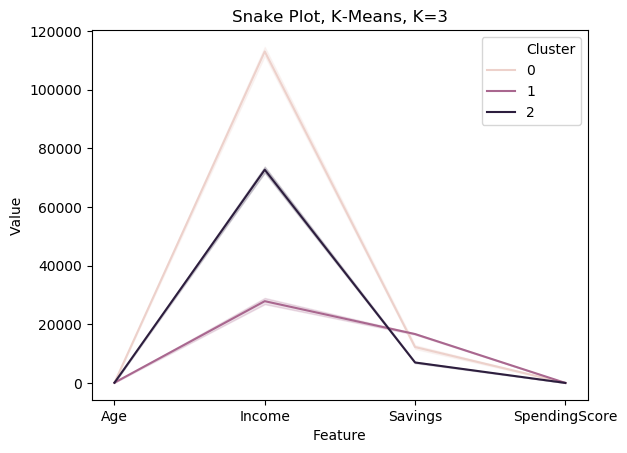

In [62]:
#Snake Plot
dat = df.copy()

dat['Cluster'] = k_means.labels_

datamart_melt = pd.melt(dat.reset_index(),
id_vars=['Cluster'],
value_vars=['Age','Income', 'SpendingScore', 'Savings'],
var_name='Feature',
value_name='Value')

plt.title('Snake Plot, K-Means, K=3')
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=datamart_melt)
plt.savefig('AirSimClient.write_file-py1.png', transparent=False);

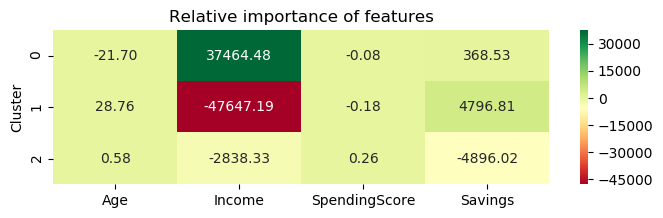

In [59]:
#Relative Importance Plots

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');
plt.savefig('AirSimClient.write_file-py1.png', transparent=False);

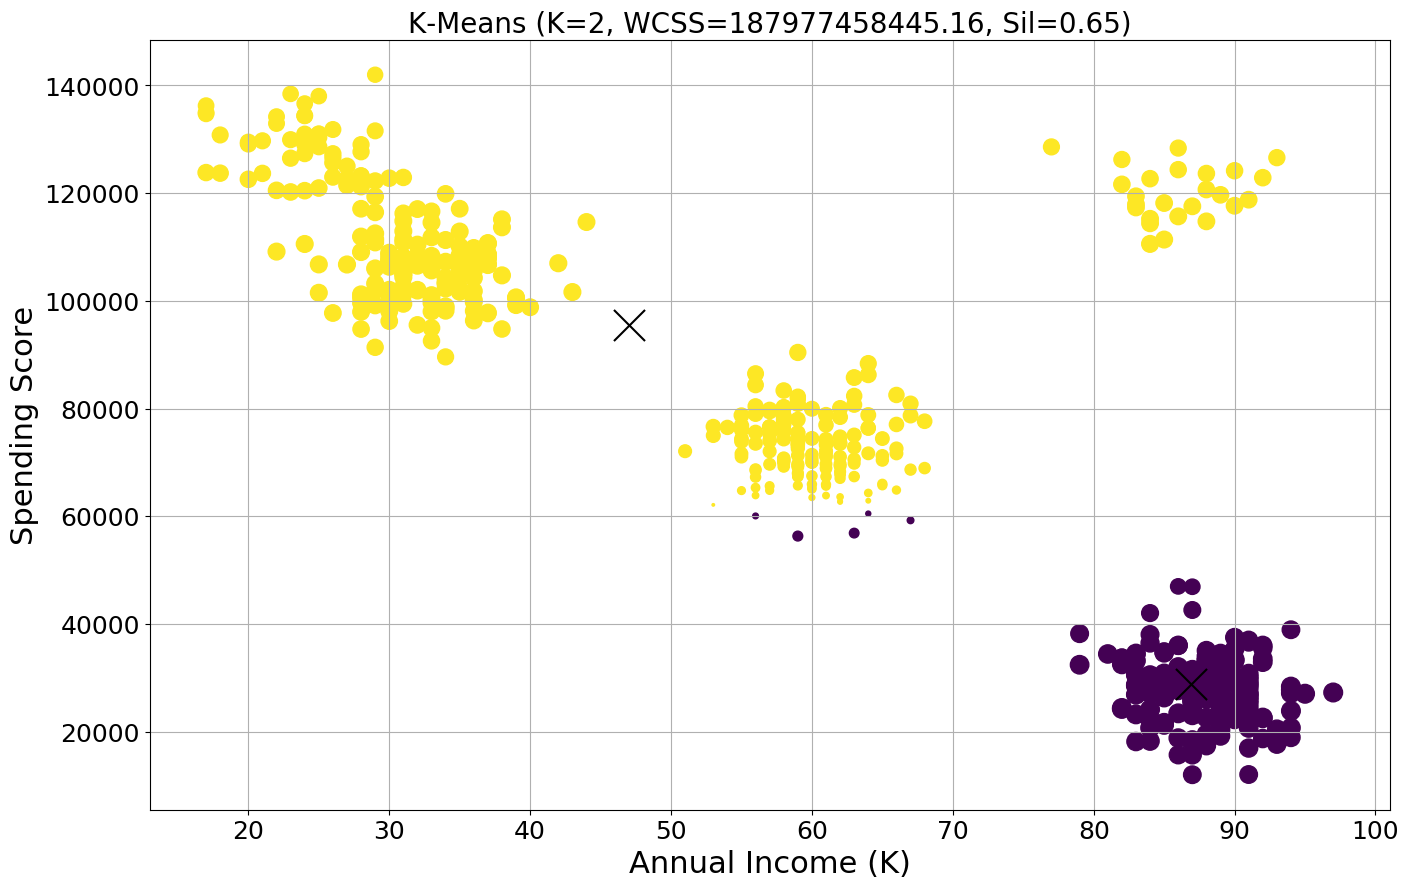

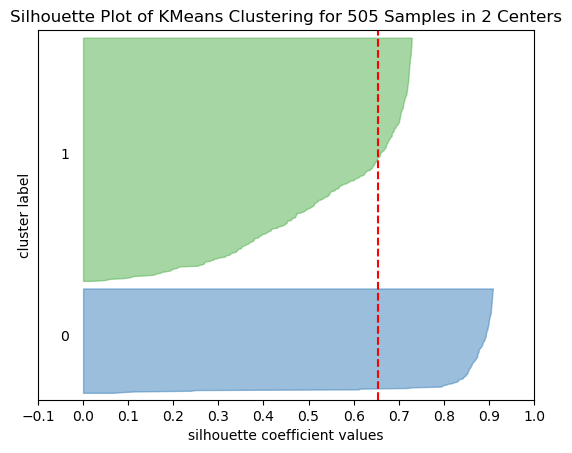

K=2, WCSS=187977458445.16, Sil=0.65


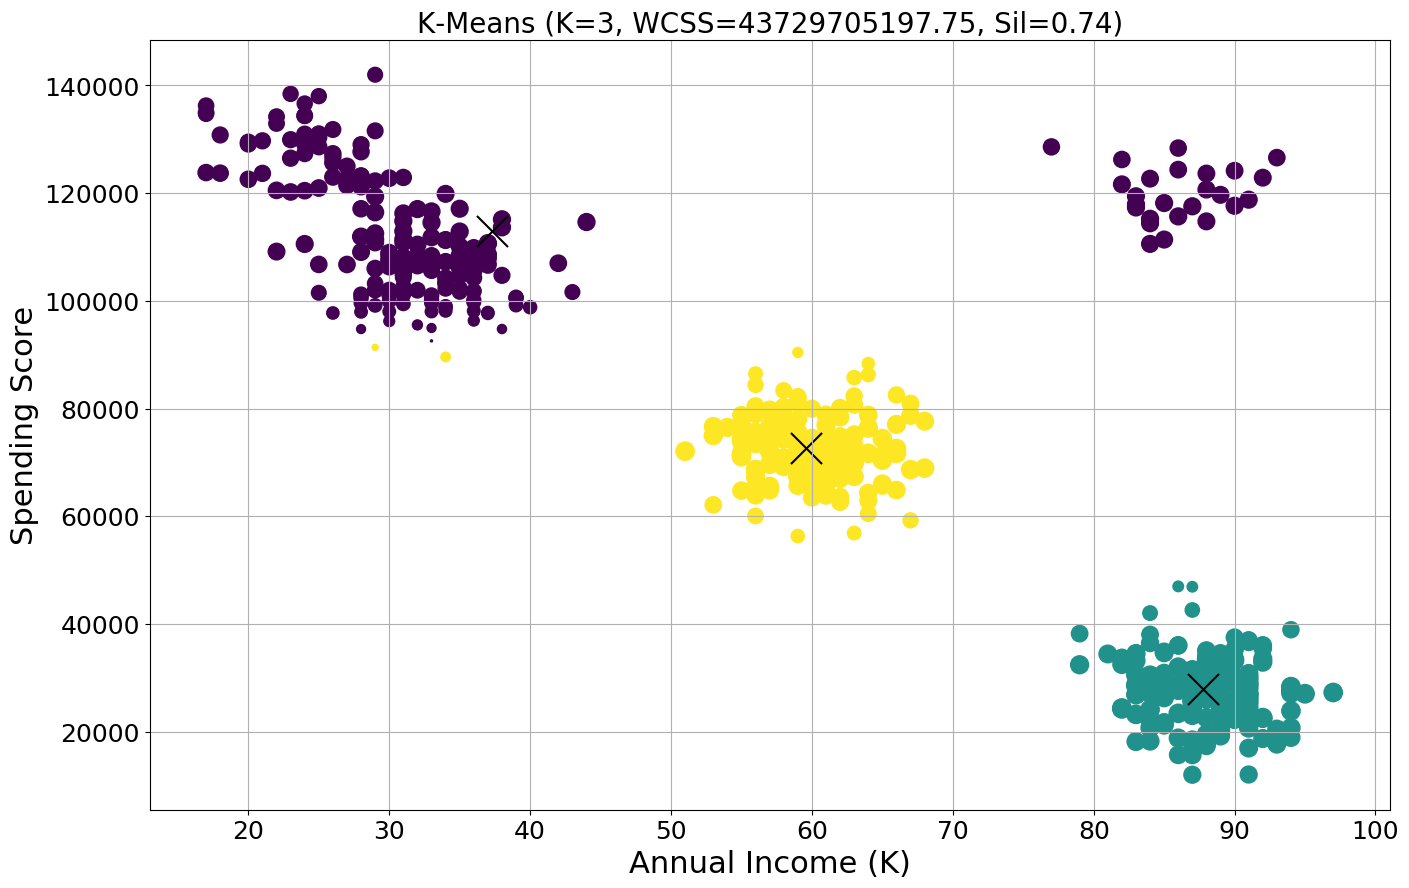

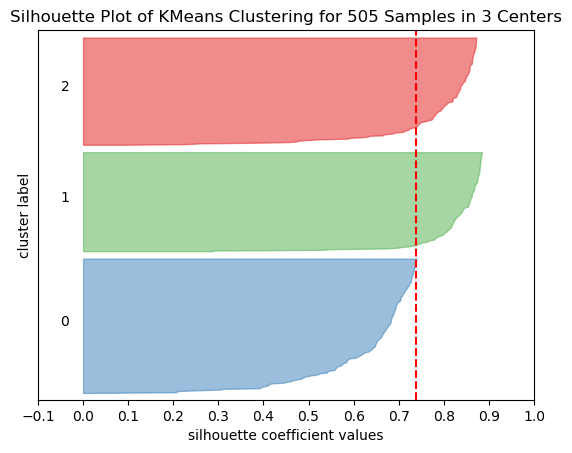

K=3, WCSS=43729705197.75, Sil=0.74


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


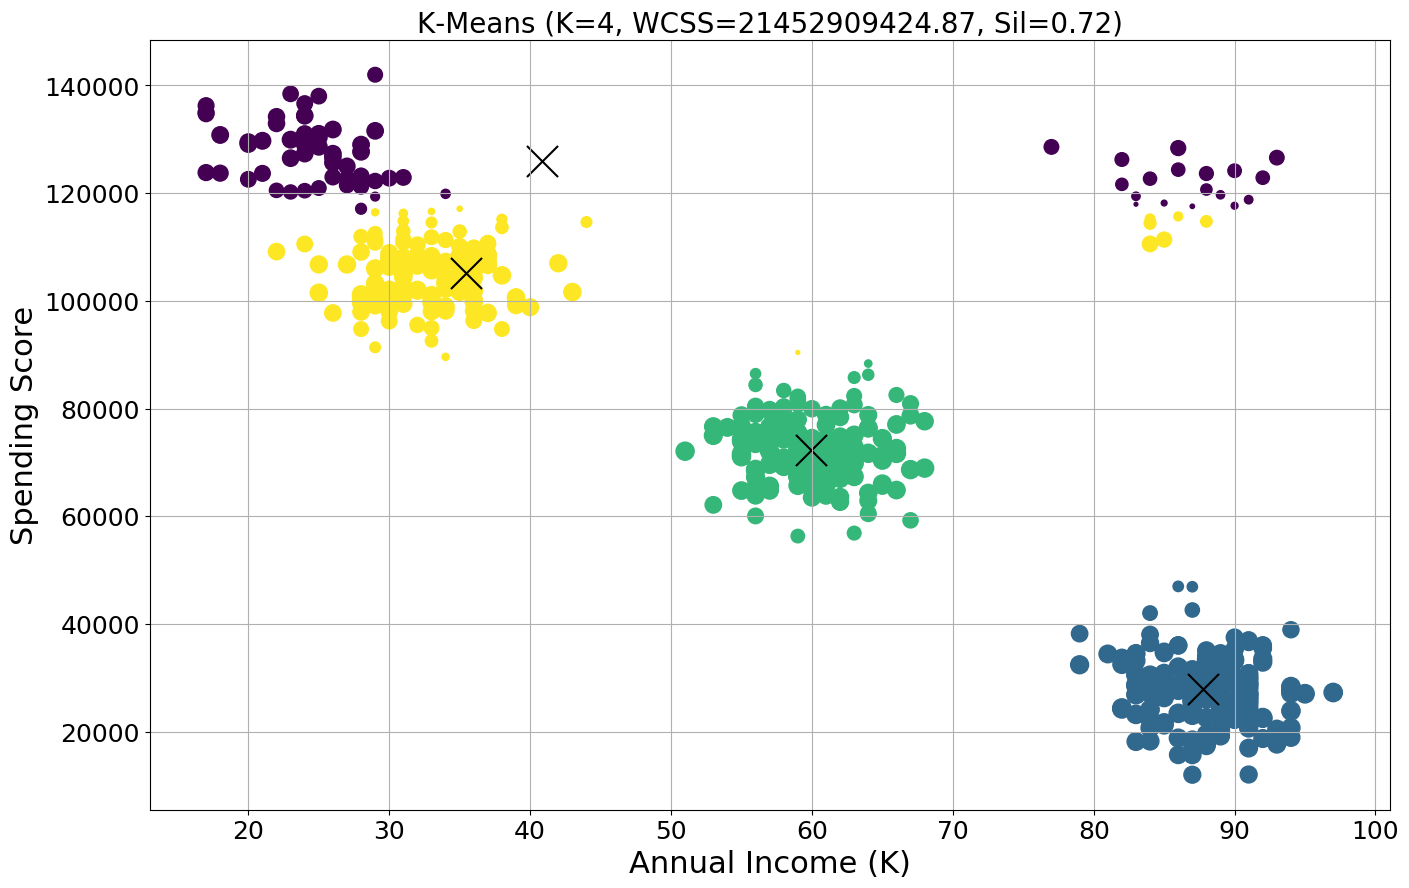

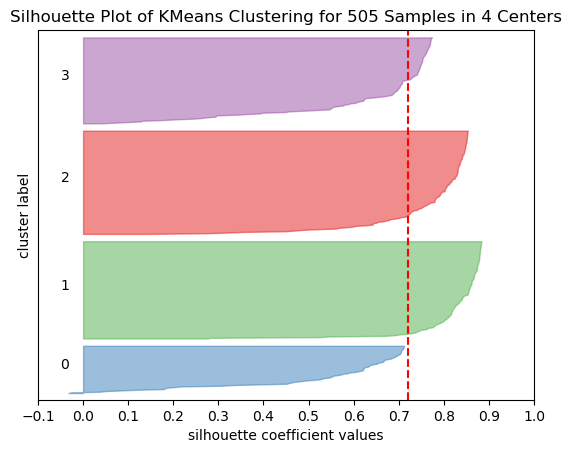

K=4, WCSS=21452909424.87, Sil=0.72


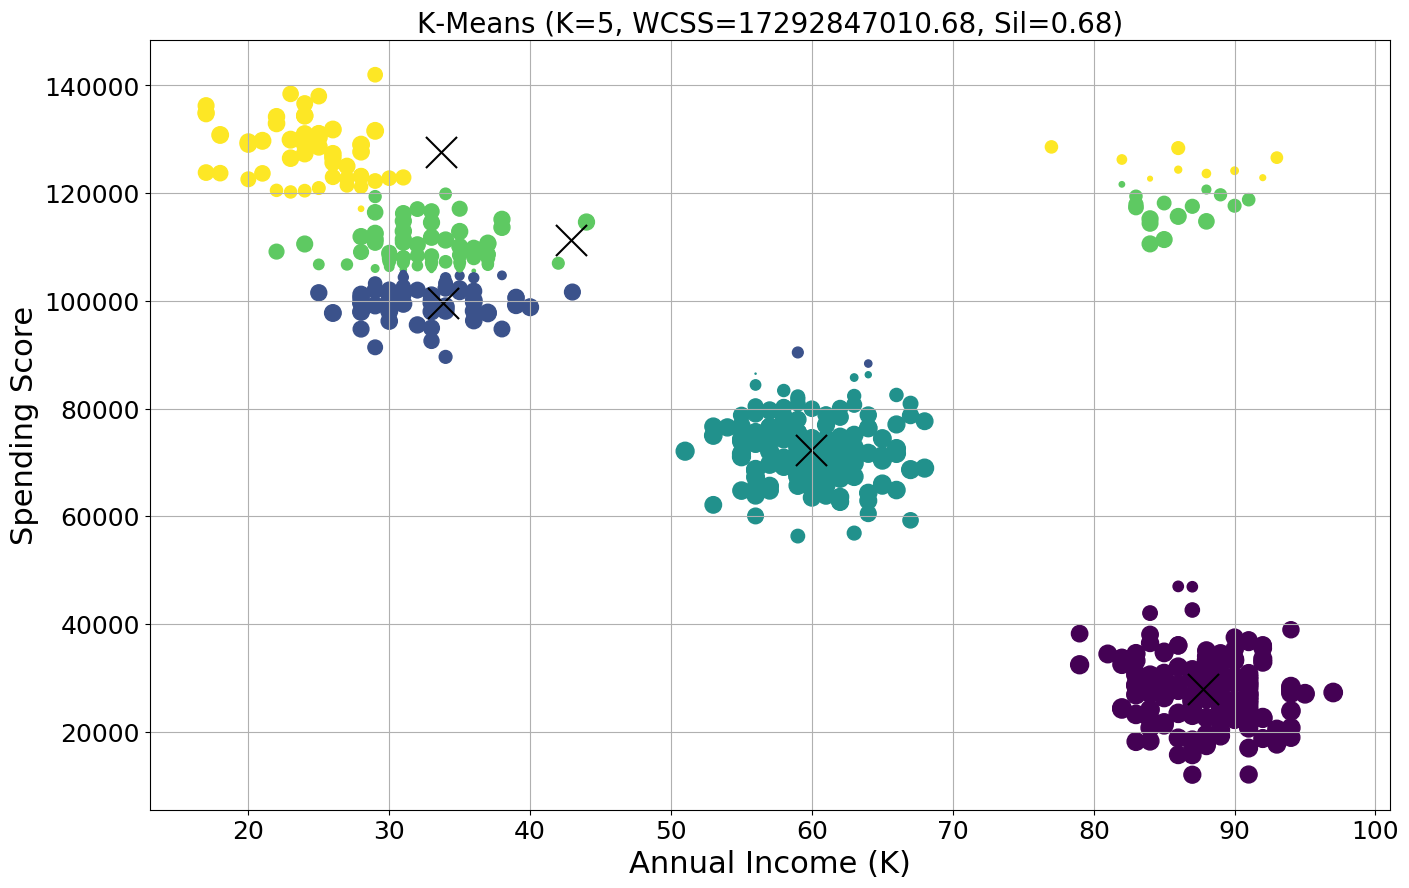

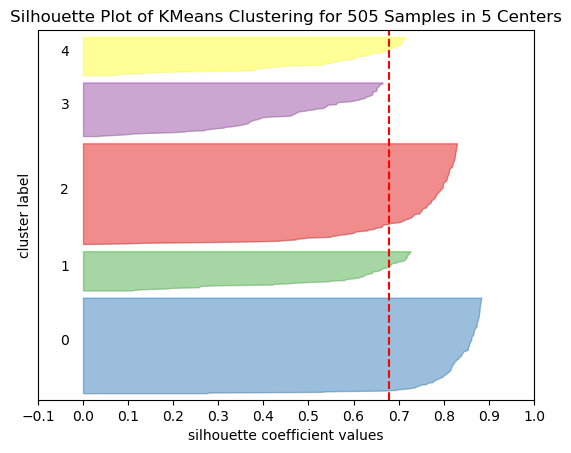

K=5, WCSS=17292847010.68, Sil=0.68


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


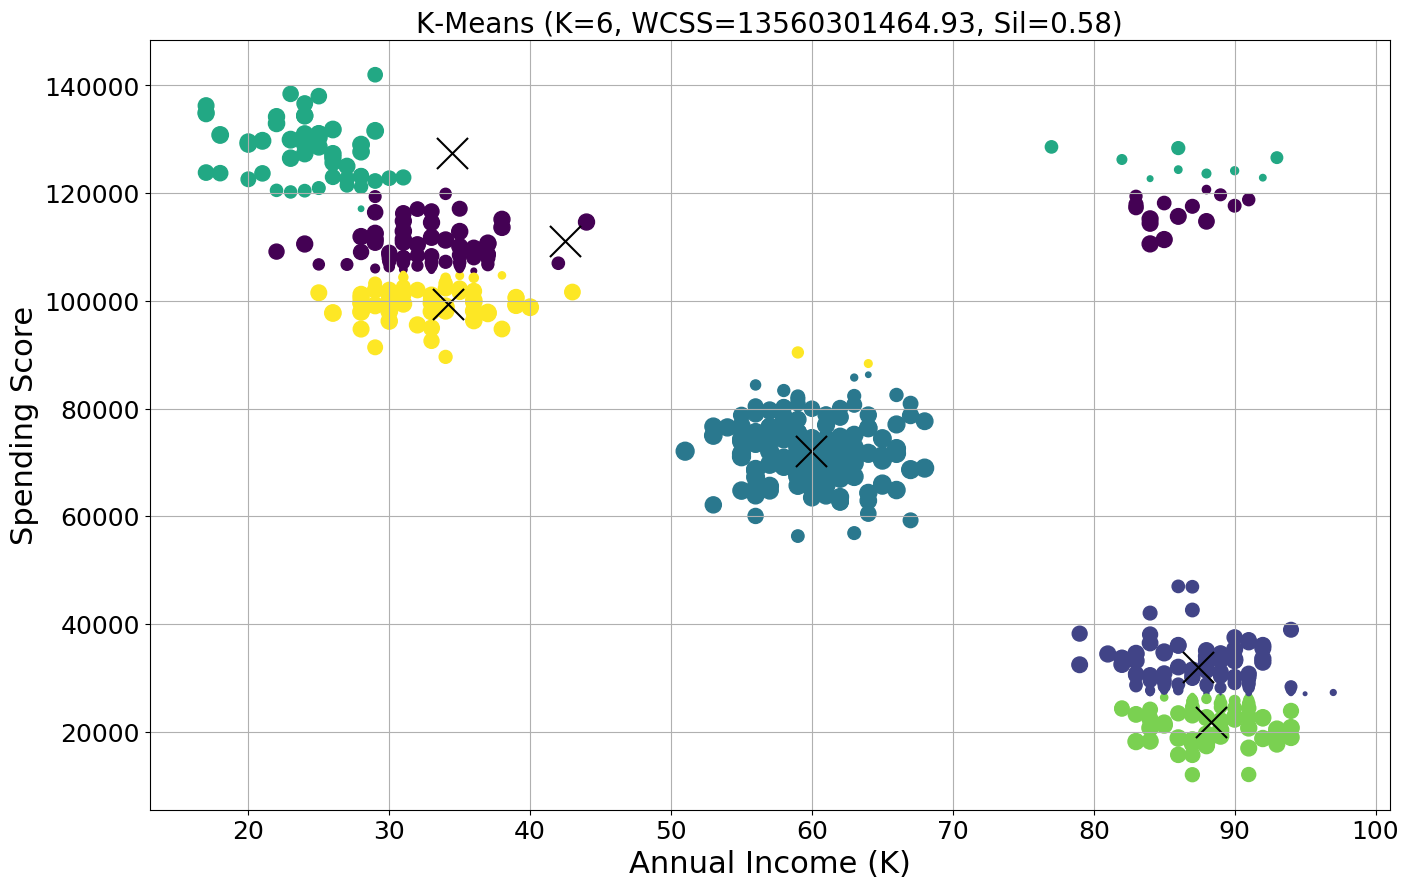

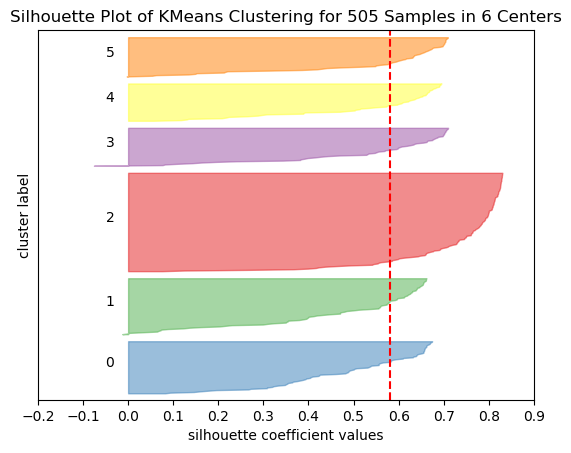

K=6, WCSS=13560301464.93, Sil=0.58


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


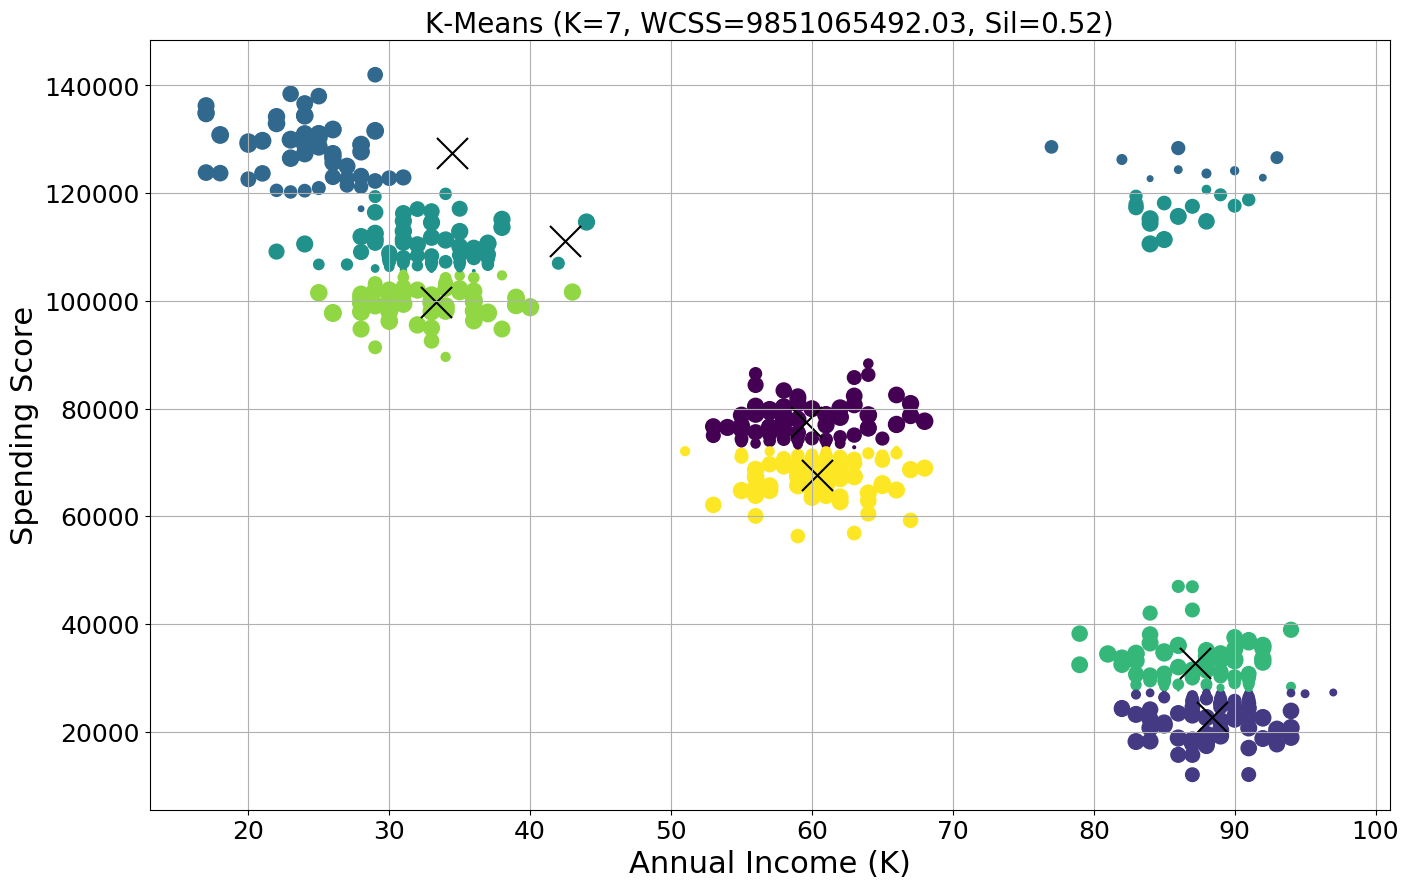

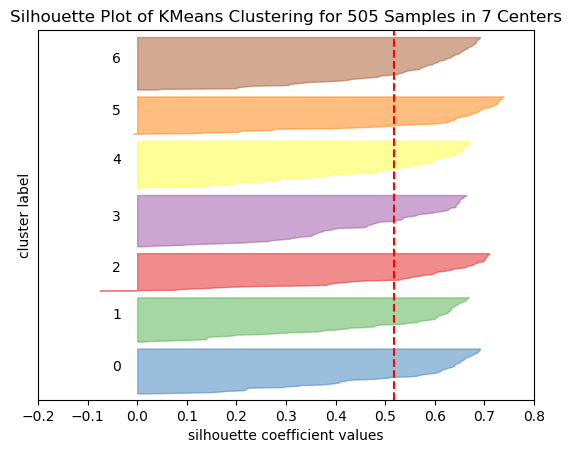

K=7, WCSS=9851065492.03, Sil=0.52


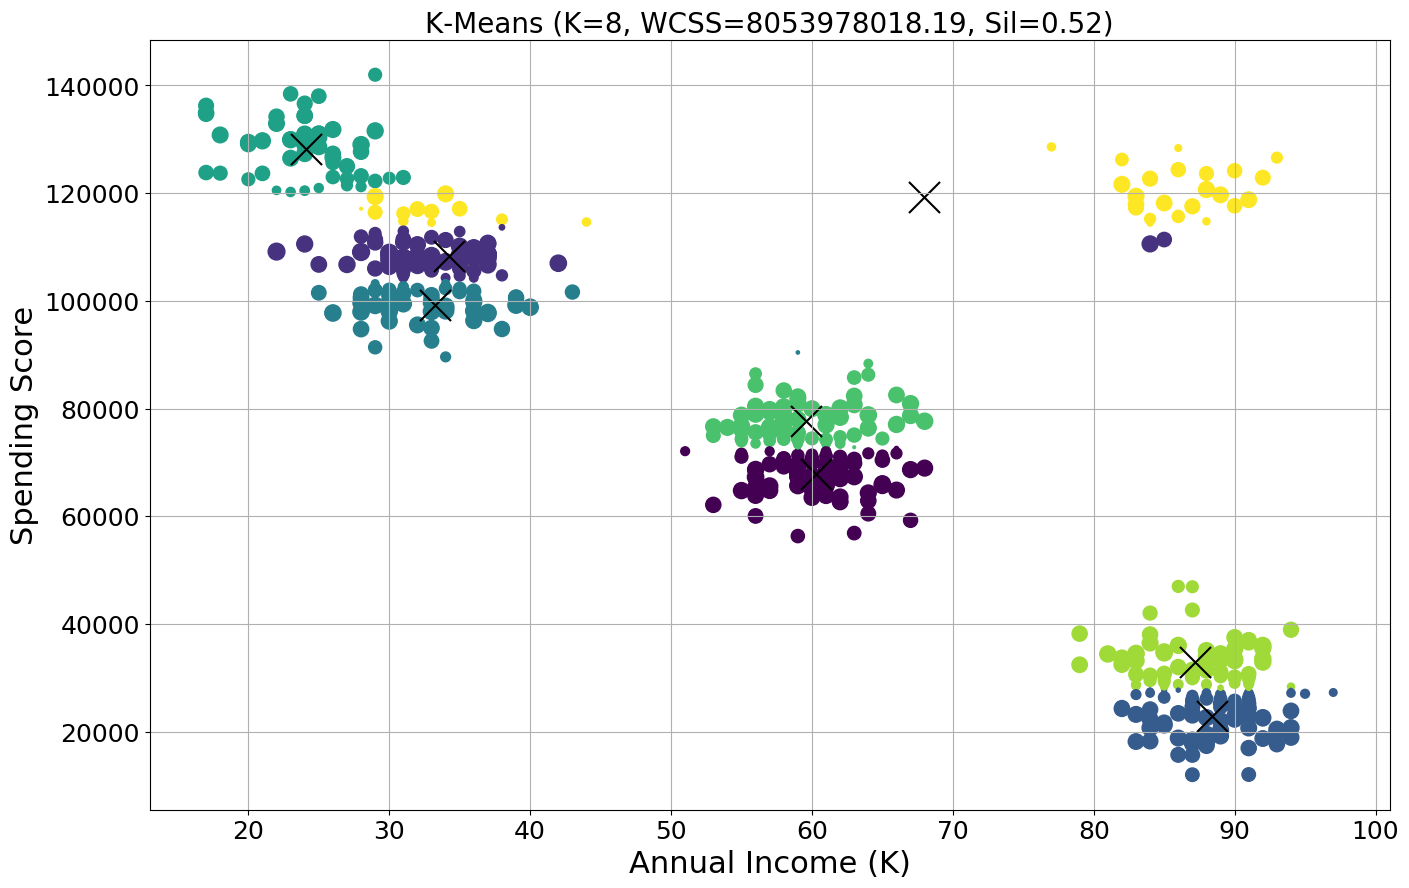

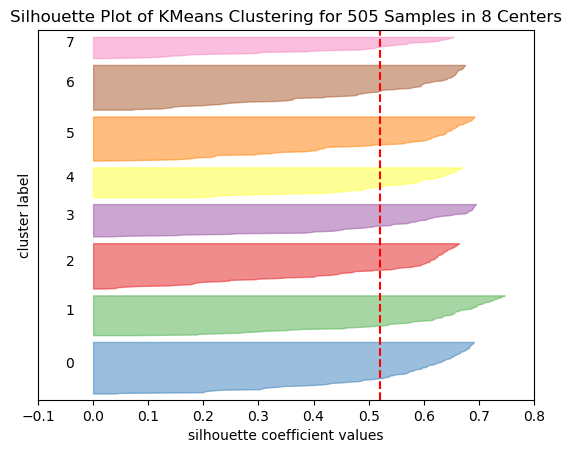

K=8, WCSS=8053978018.19, Sil=0.52


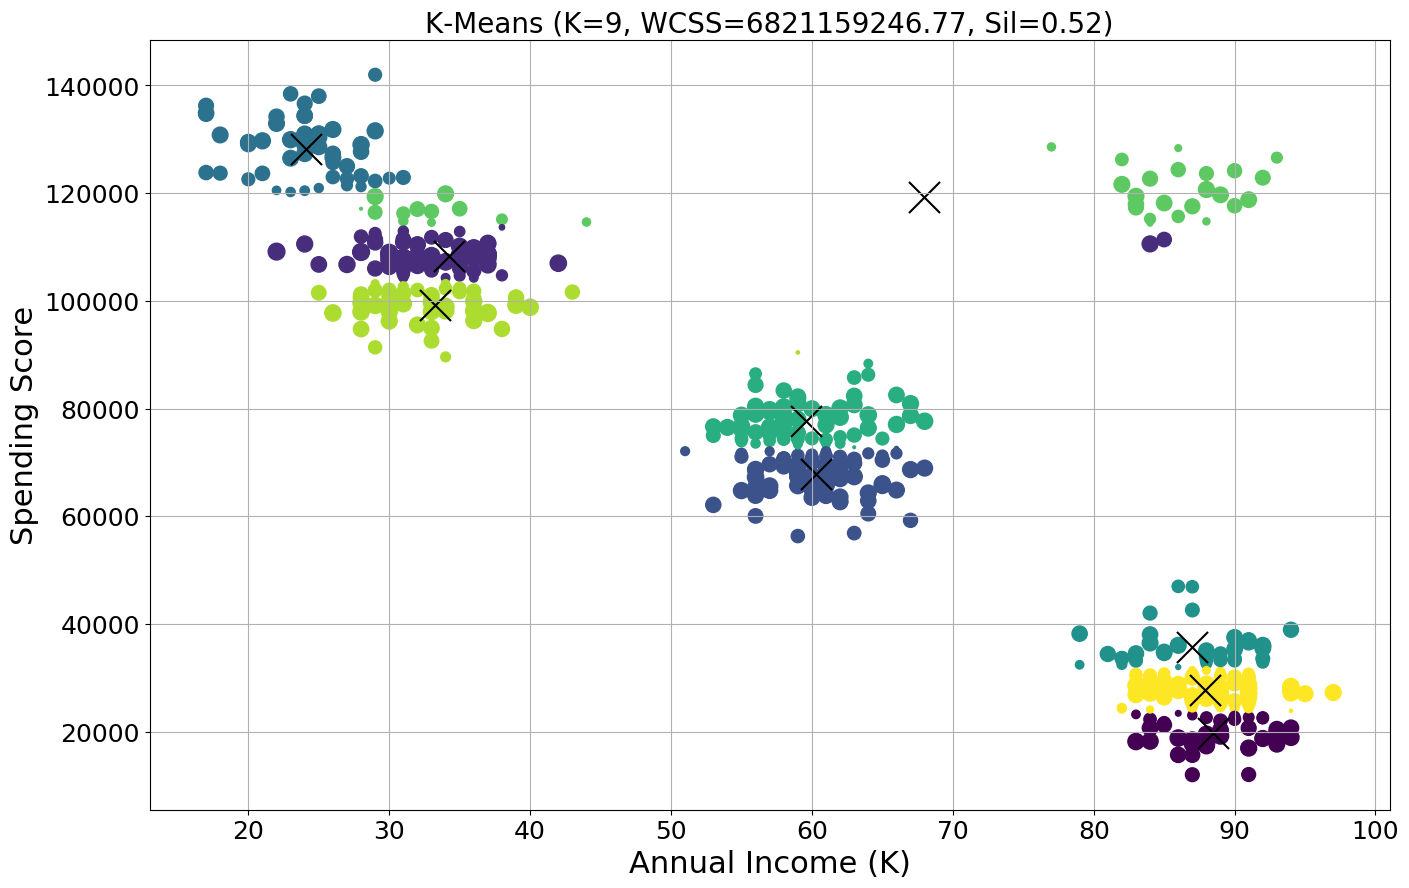

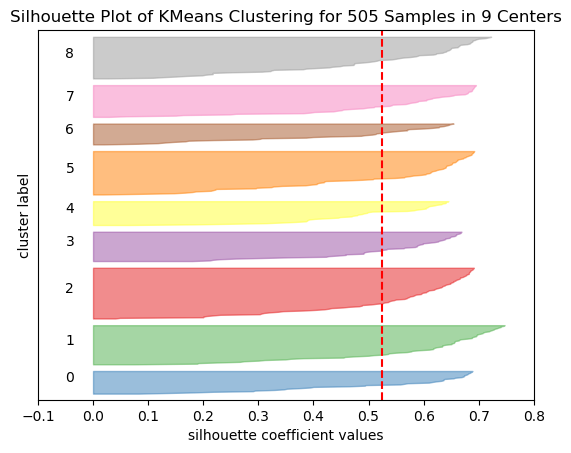

K=9, WCSS=6821159246.77, Sil=0.52


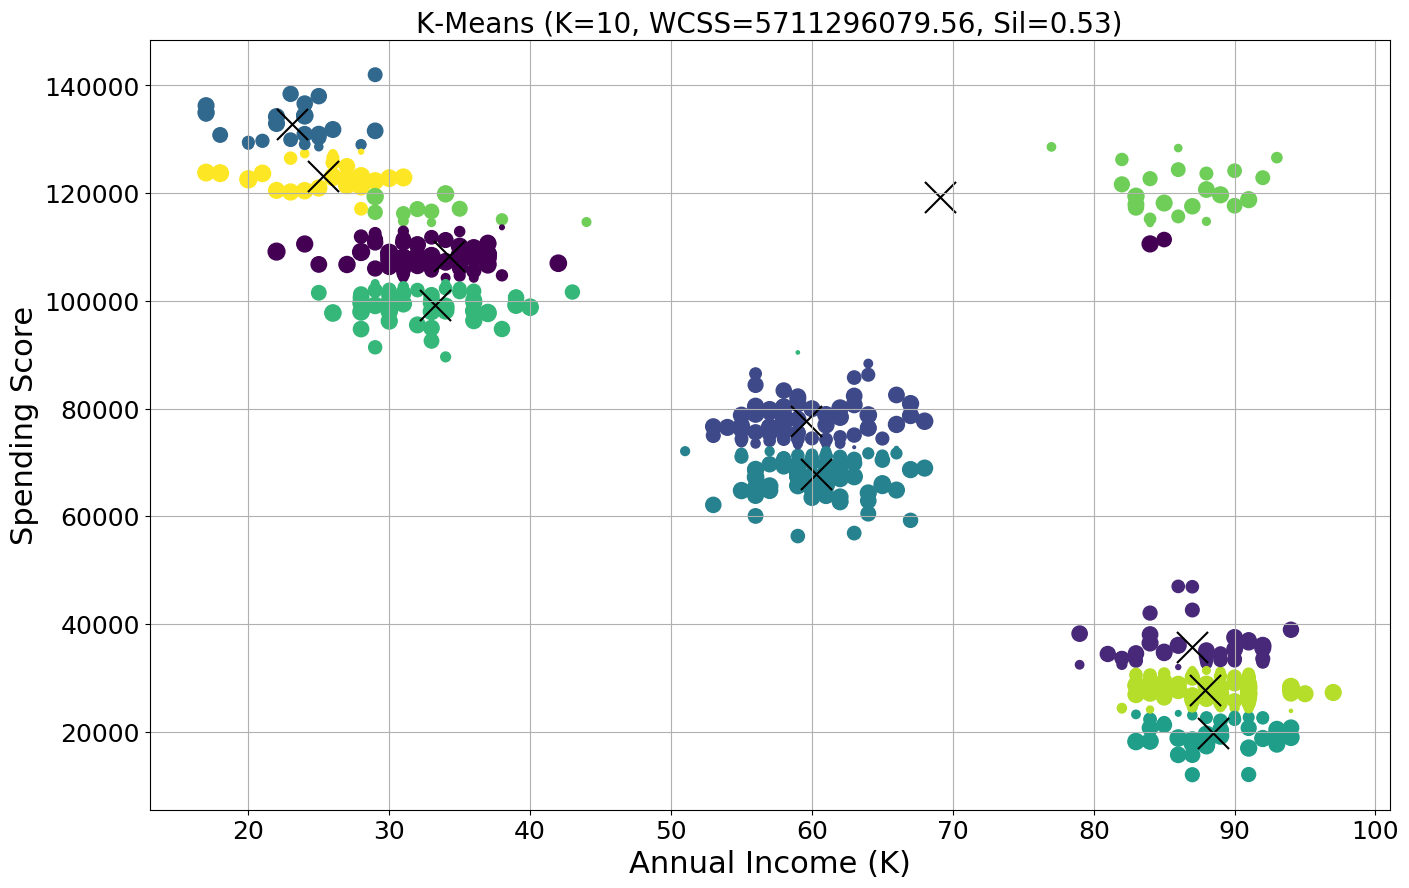

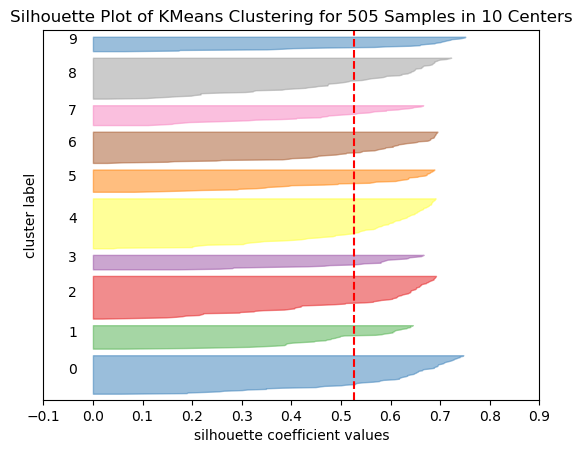

K=10, WCSS=5711296079.56, Sil=0.53


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


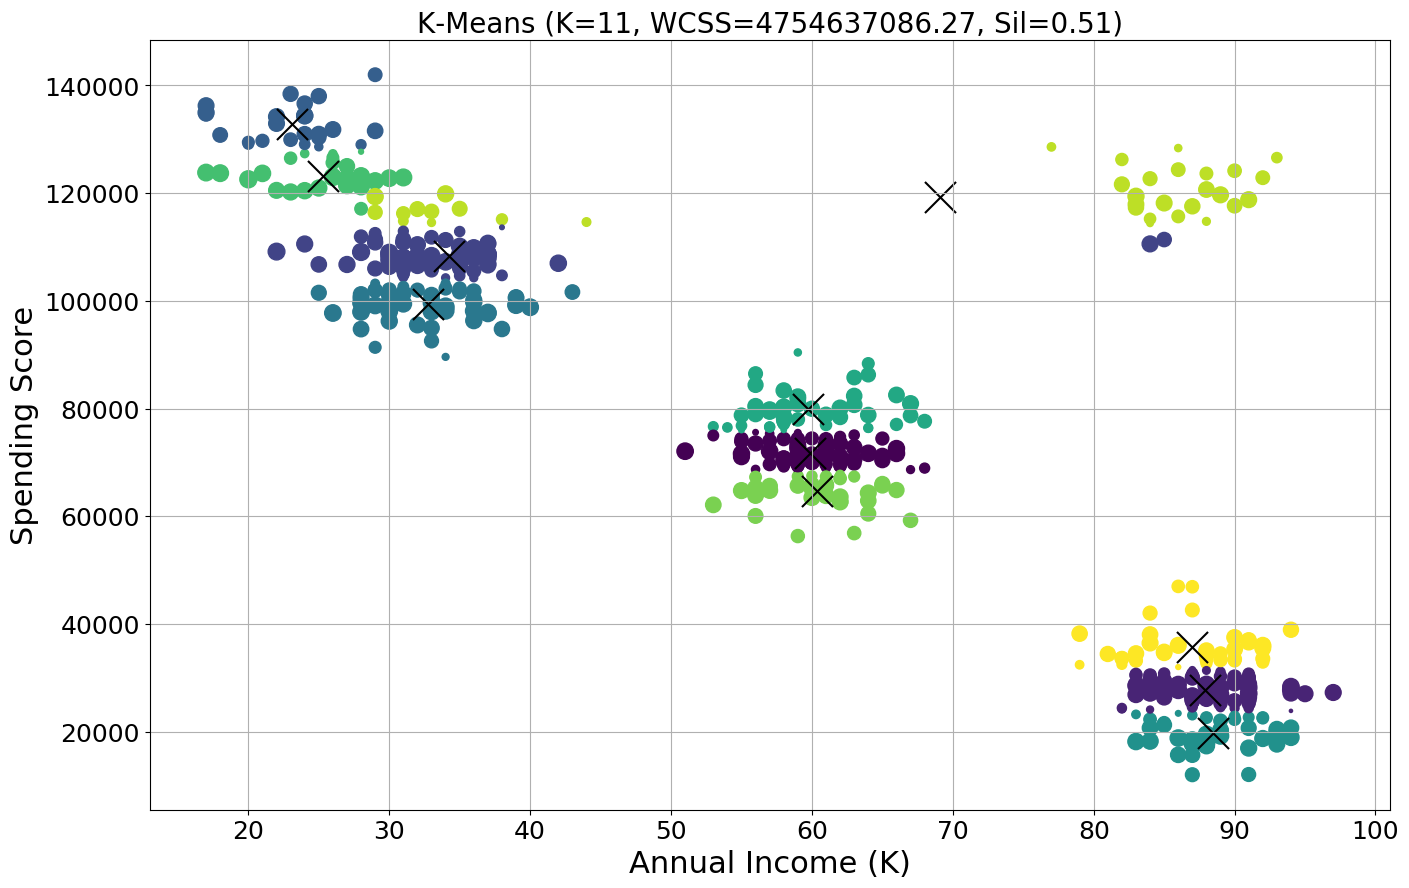

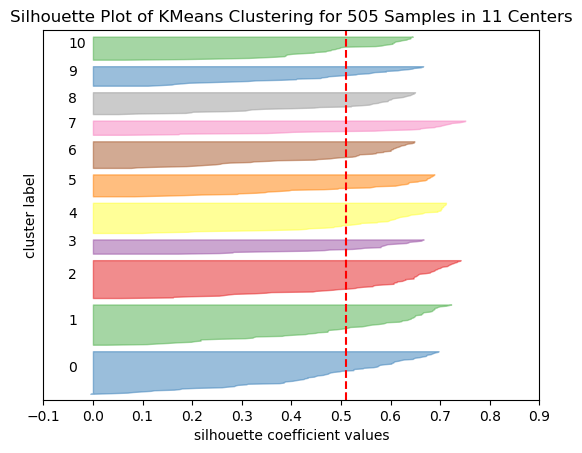

K=11, WCSS=4754637086.27, Sil=0.51


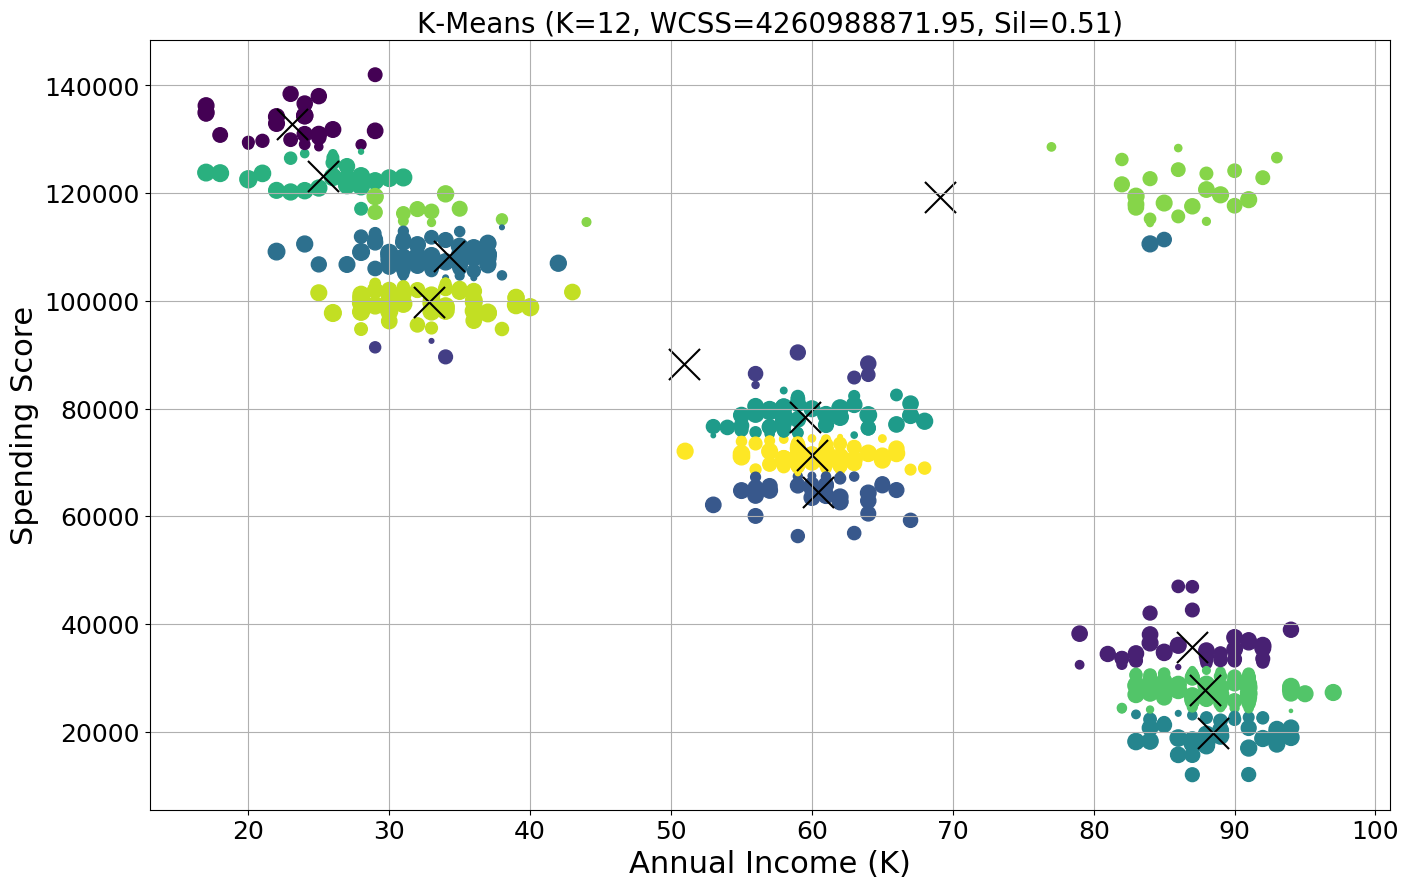

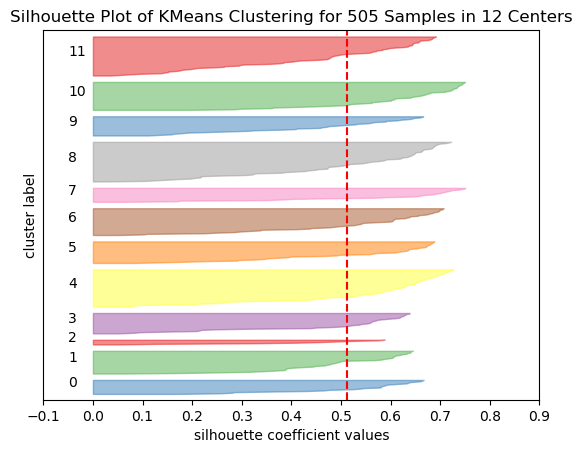

K=12, WCSS=4260988871.95, Sil=0.51


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


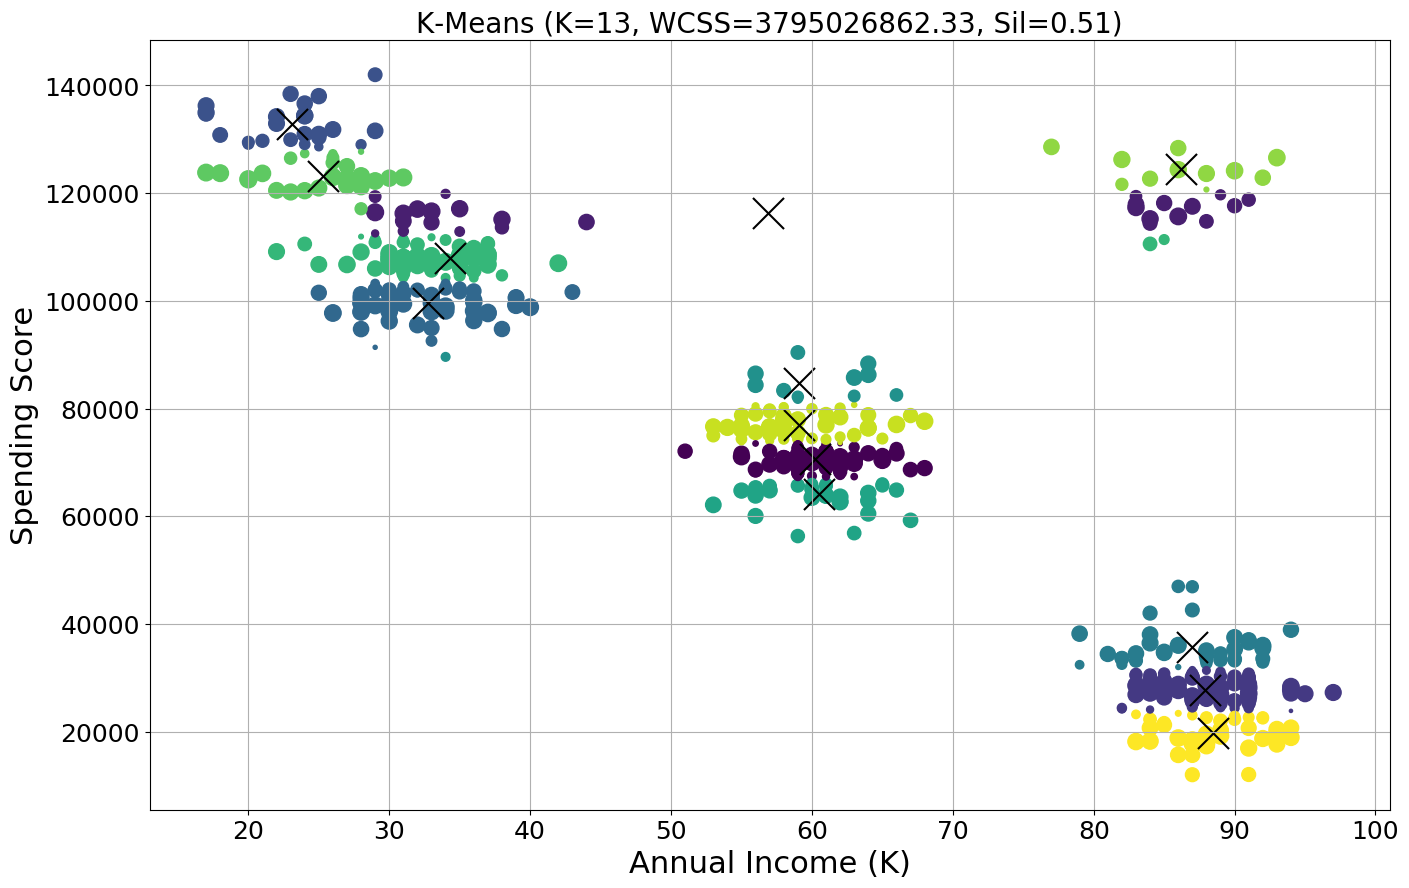

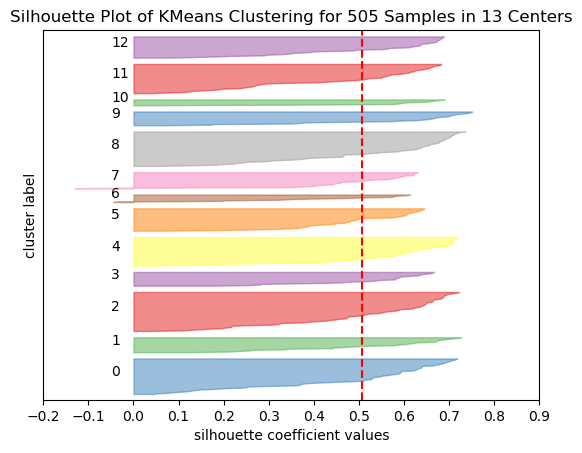

K=13, WCSS=3795026862.33, Sil=0.51


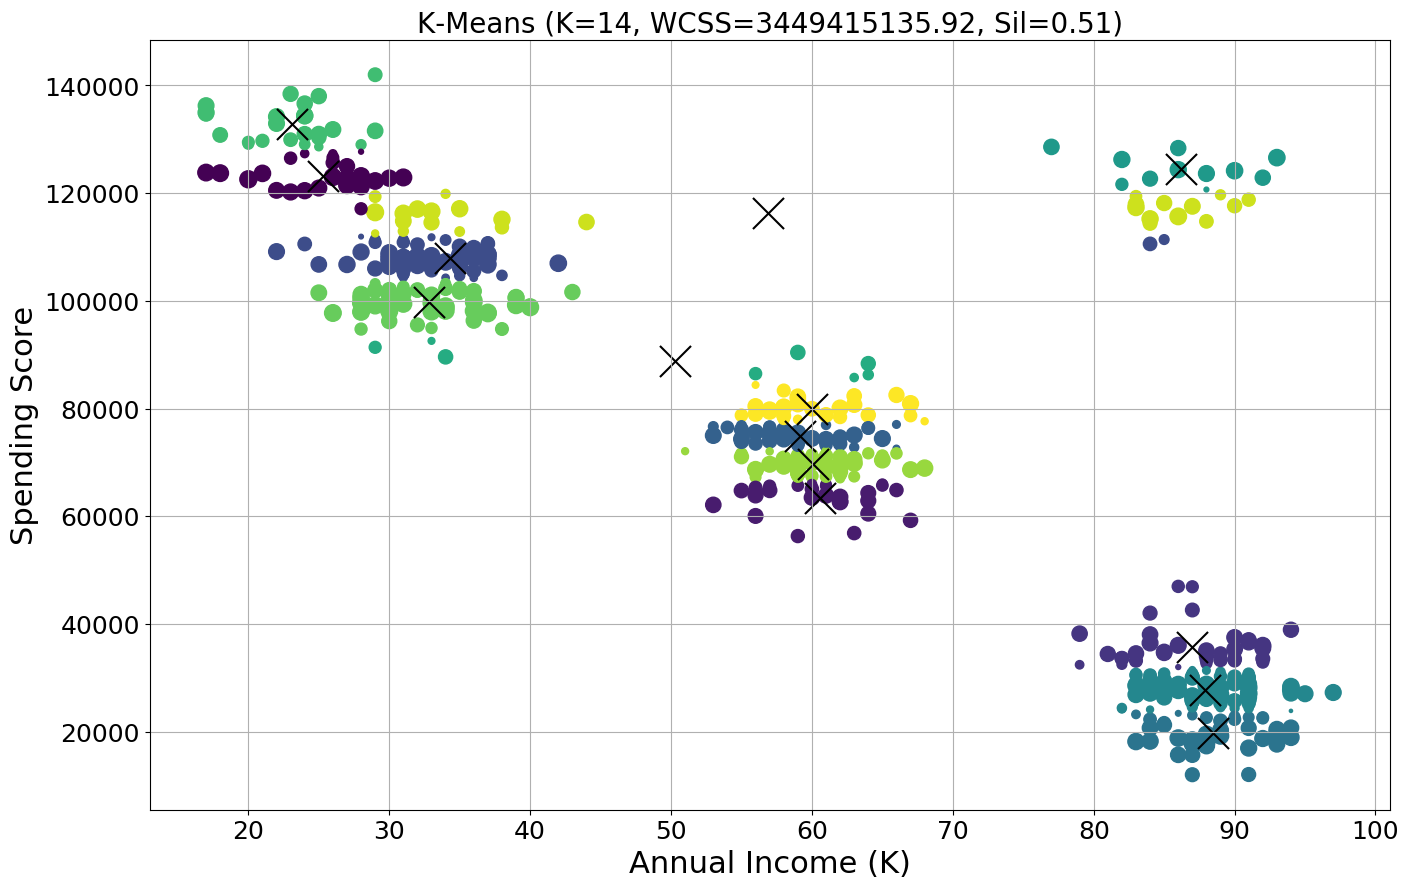

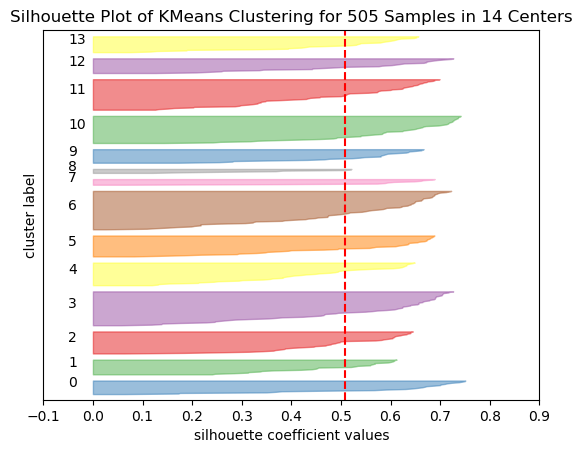

K=14, WCSS=3449415135.92, Sil=0.51


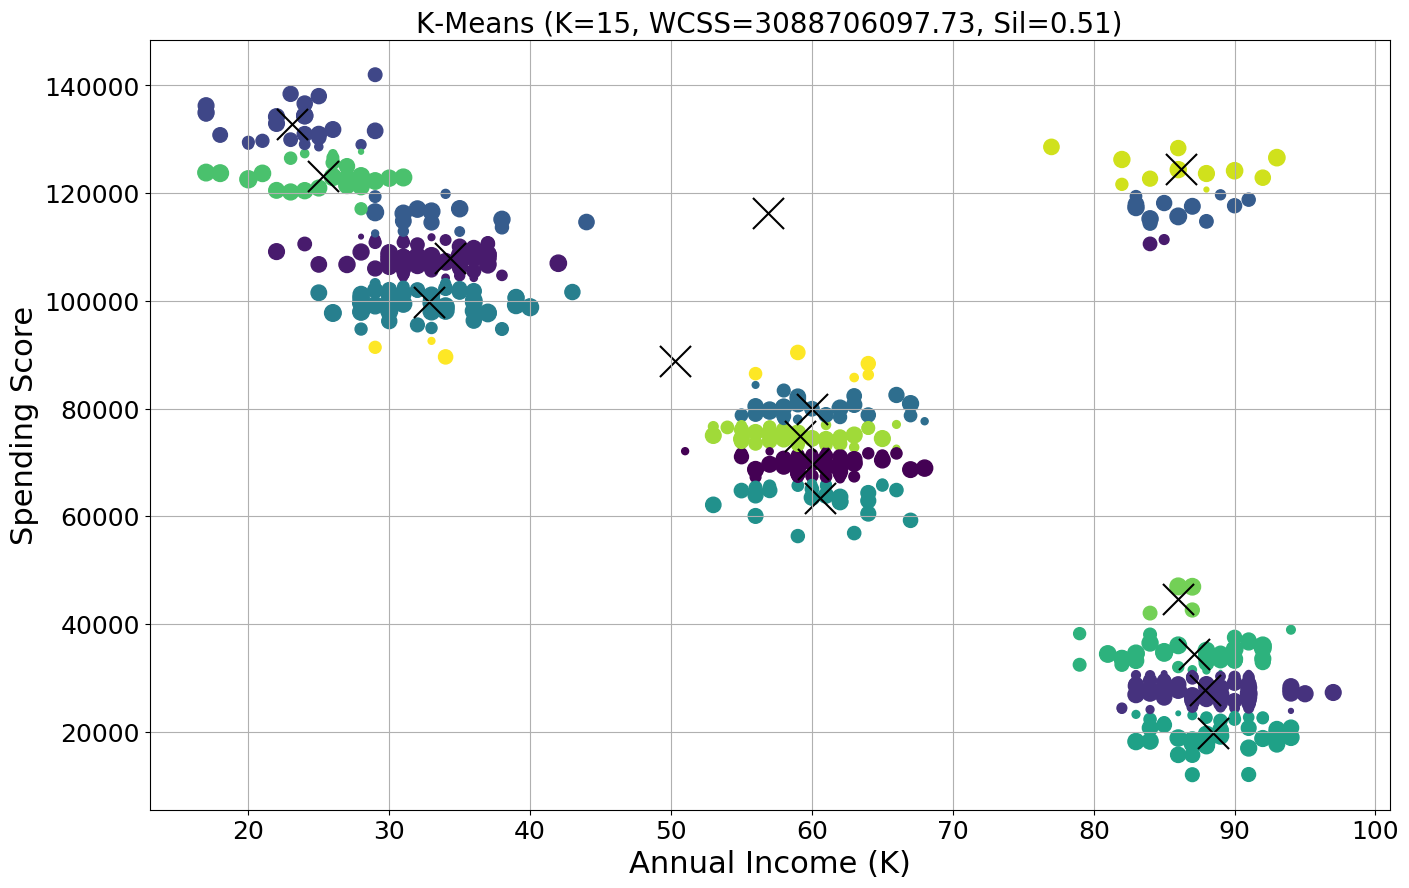

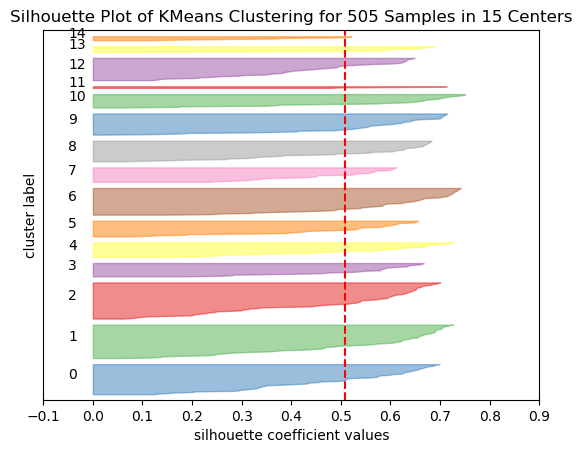

K=15, WCSS=3088706097.73, Sil=0.51


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


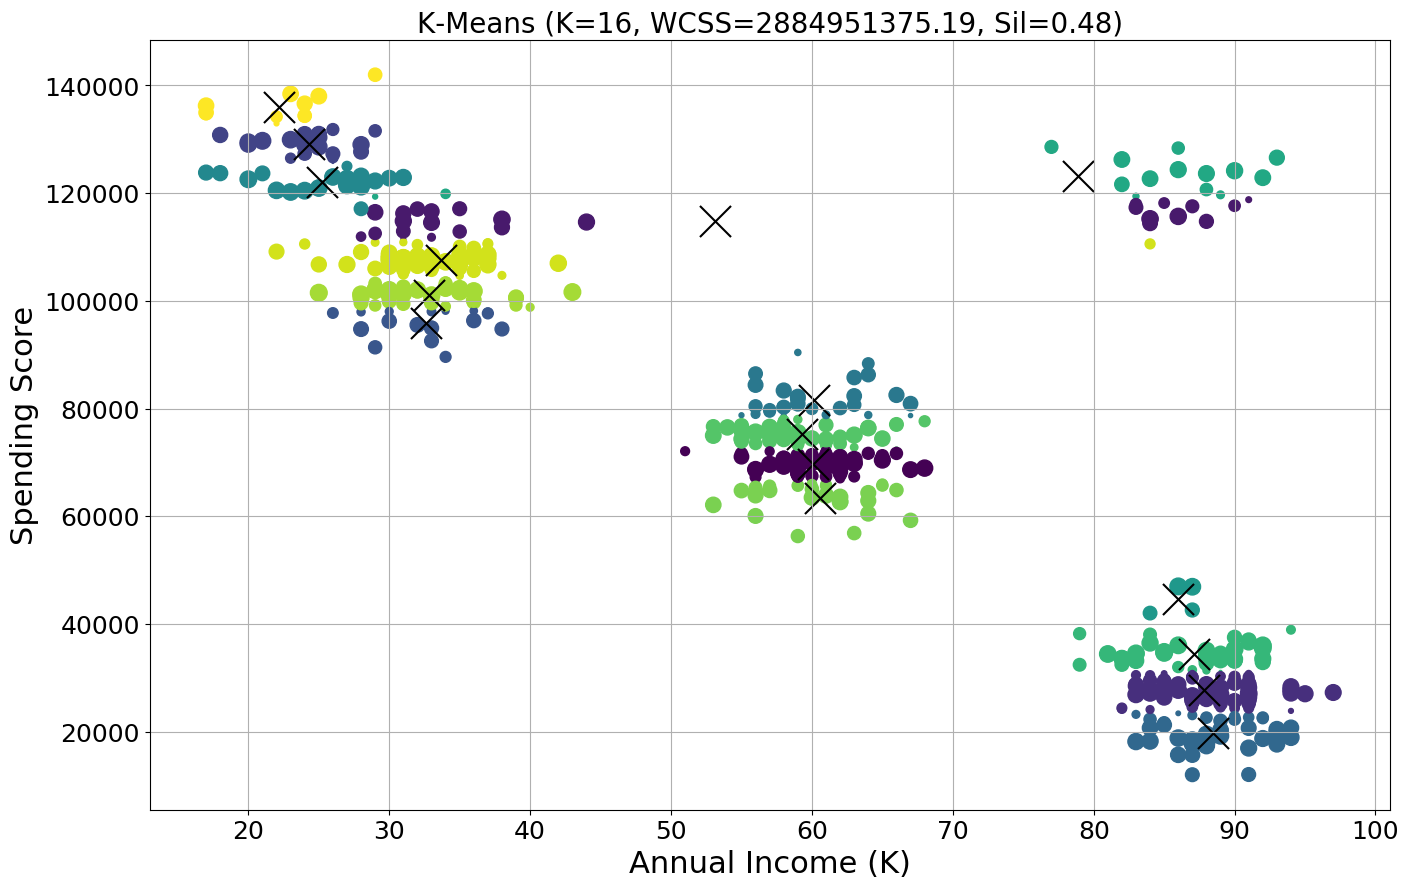

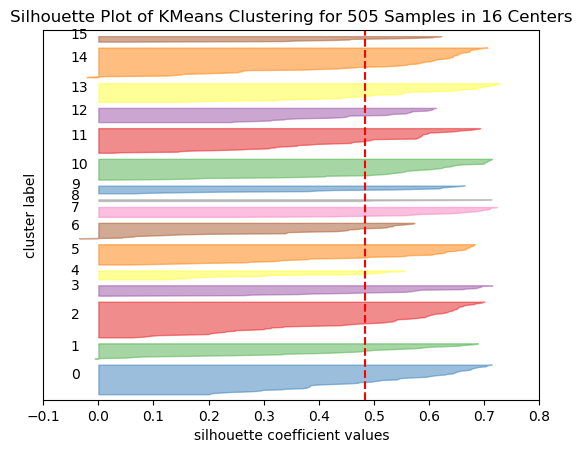

K=16, WCSS=2884951375.19, Sil=0.48


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


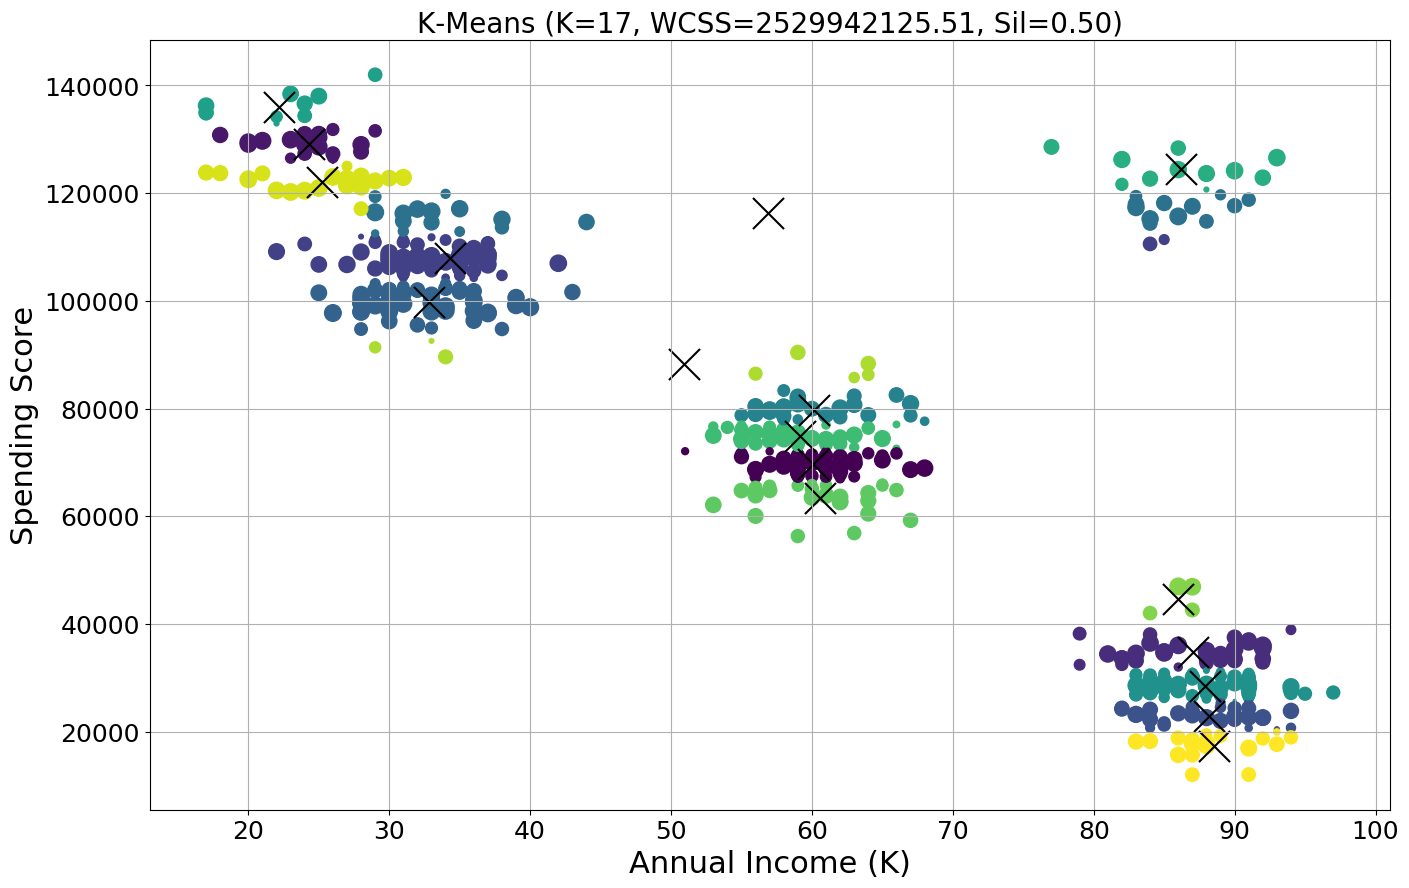

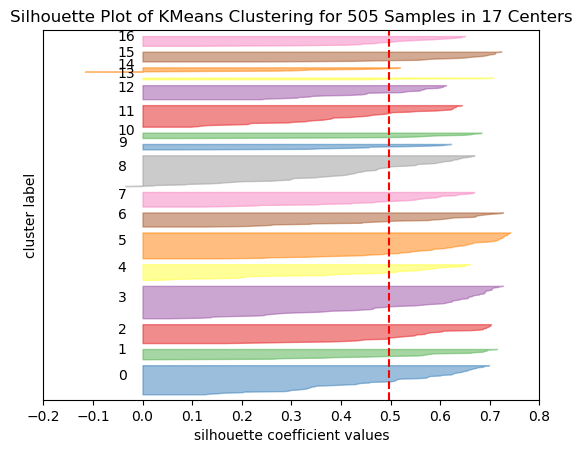

K=17, WCSS=2529942125.51, Sil=0.50


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


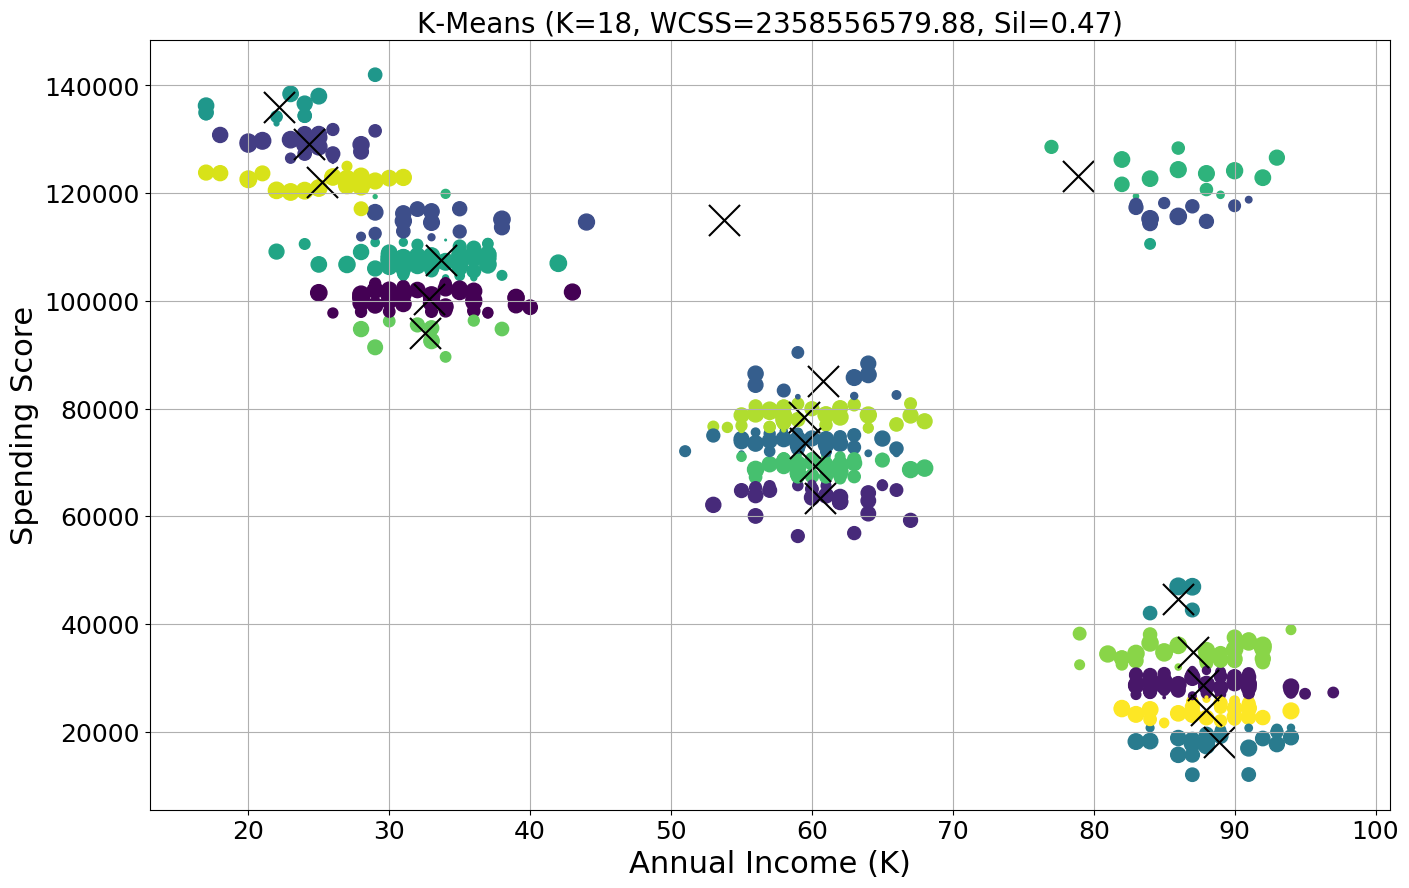

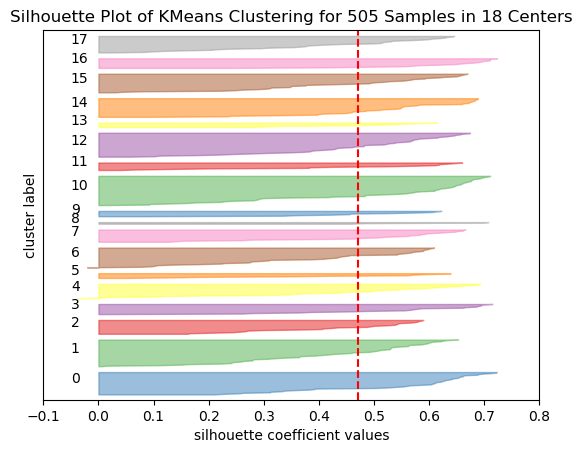

K=18, WCSS=2358556579.88, Sil=0.47


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


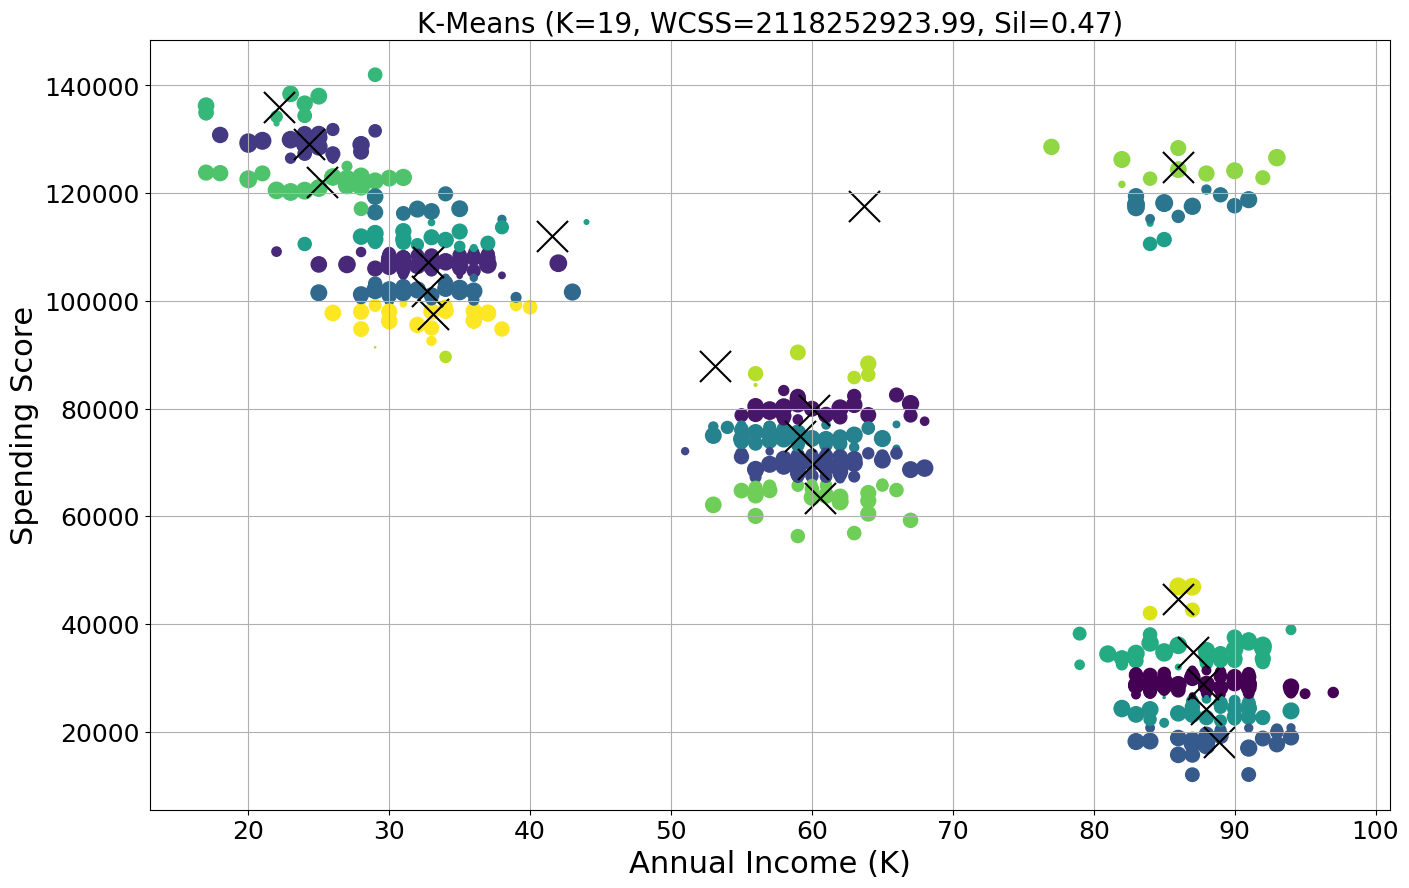

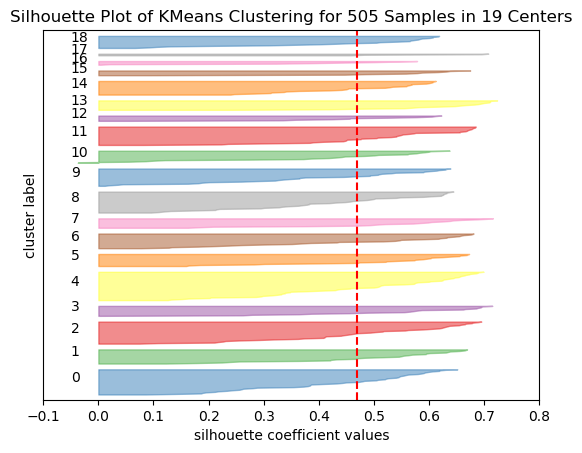

K=19, WCSS=2118252923.99, Sil=0.47


C:\Users\rahim.chagani\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


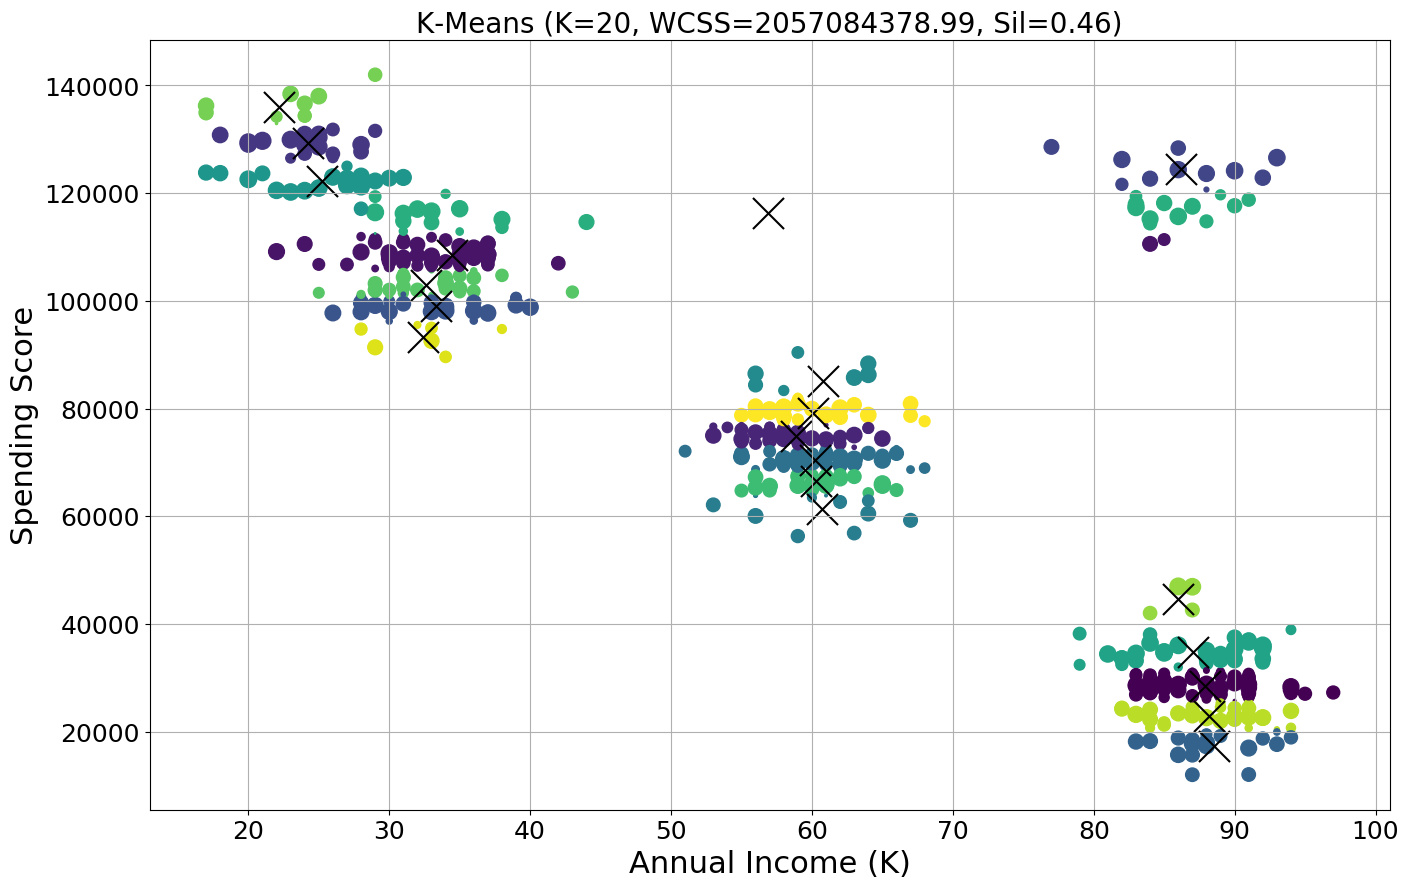

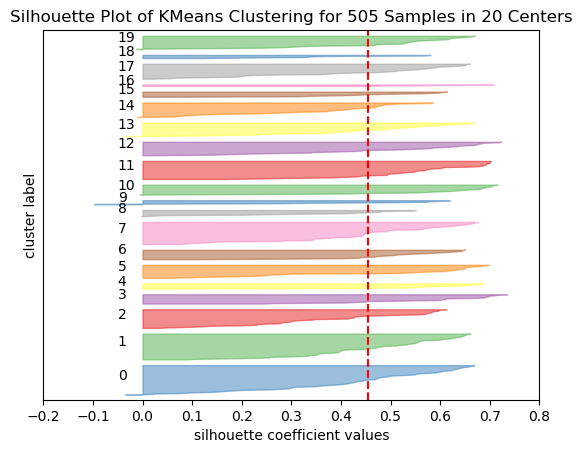

K=20, WCSS=2057084378.99, Sil=0.46


In [60]:
#Experiment with Lots of Ks
def do_kmeans(df, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(df)
    wcss = k_means.inertia_
    sil = silhouette_score(df, k_means.labels_)
    
    plt.style.use('default');

    sample_silhouette_values = silhouette_samples(df, k_means.labels_)
    sizes = 200*sample_silhouette_values

    plt.figure(figsize=(16, 10));
    plt.grid(True);

    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=sizes, c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

    plt.title("K-Means (K={}, WCSS={:.2f}, Sil={:.2f})".format(k, wcss, sil), fontsize=20);
    plt.xlabel('Annual Income (K)', fontsize=22);
    plt.ylabel('Spending Score', fontsize=22);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    plt.savefig('AirSimClient.write_file-py1.png'.format(k));
    plt.show()
    
    visualizer = SilhouetteVisualizer(k_means)
    visualizer.fit(df)
    visualizer.poof()
    fig = visualizer.ax.get_figure()
    fig.savefig('AirSimClient.write_file-py1.png'.format(k), transparent=False);
    
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 21):
    do_kmeans(df, k)

In [45]:
#Look at Individual Silhouette Scores
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42)
k_means.fit(df)
sample_silhouette_values = silhouette_samples(df, k_means.labels_)

X_tmp = df.copy()
X_tmp['Cluster ID'] = k_means.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [46]:
X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

Age  Income  SpendingScore       Savings  Cluster ID  Silhouette
88    56   86484       0.732123   8777.496177           2    0.003240
350   36  105567       0.312639  14355.310950           3    0.029404
282   33  105667       0.250751  12869.761070           3    0.047509
21    84  122696       0.082187  13809.734090           4    0.057269
360   28  117108       0.857078   4749.879237           4    0.073256

Age  Income  SpendingScore      Savings  Cluster ID  Silhouette
448   87   26665       0.402146  17376.91474           0    0.882158
272   91   26424       0.319389  16501.46878           0    0.882485
464   86   27705       0.329377  17130.85610           0    0.882530
335   89   26940       0.326005  16555.15938           0    0.883180
375   84   27384       0.313647  16734.67275           0    0.883241

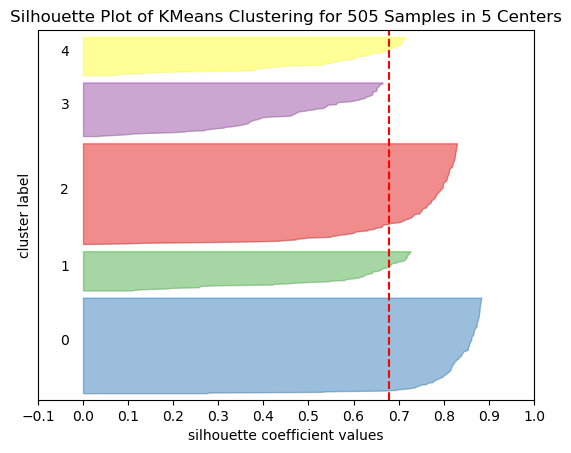

In [47]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(df)
visualizer.poof()
fig = visualizer.ax.get_figure()
fig.savefig('AirSimClient.write_file-py1.png'.format(k_means.n_clusters), transparent=False);

In [48]:
#Hierarchical (Agglomerative)
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(df)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x0000021EFD55EAE8>)

In [49]:
agg.labels_

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 1, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 4, 3, 1, 0, 0, 1, 4, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 4, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 4, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 4, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

In [50]:
silhouette_score(df, agg.labels_)


0.6908388206525322

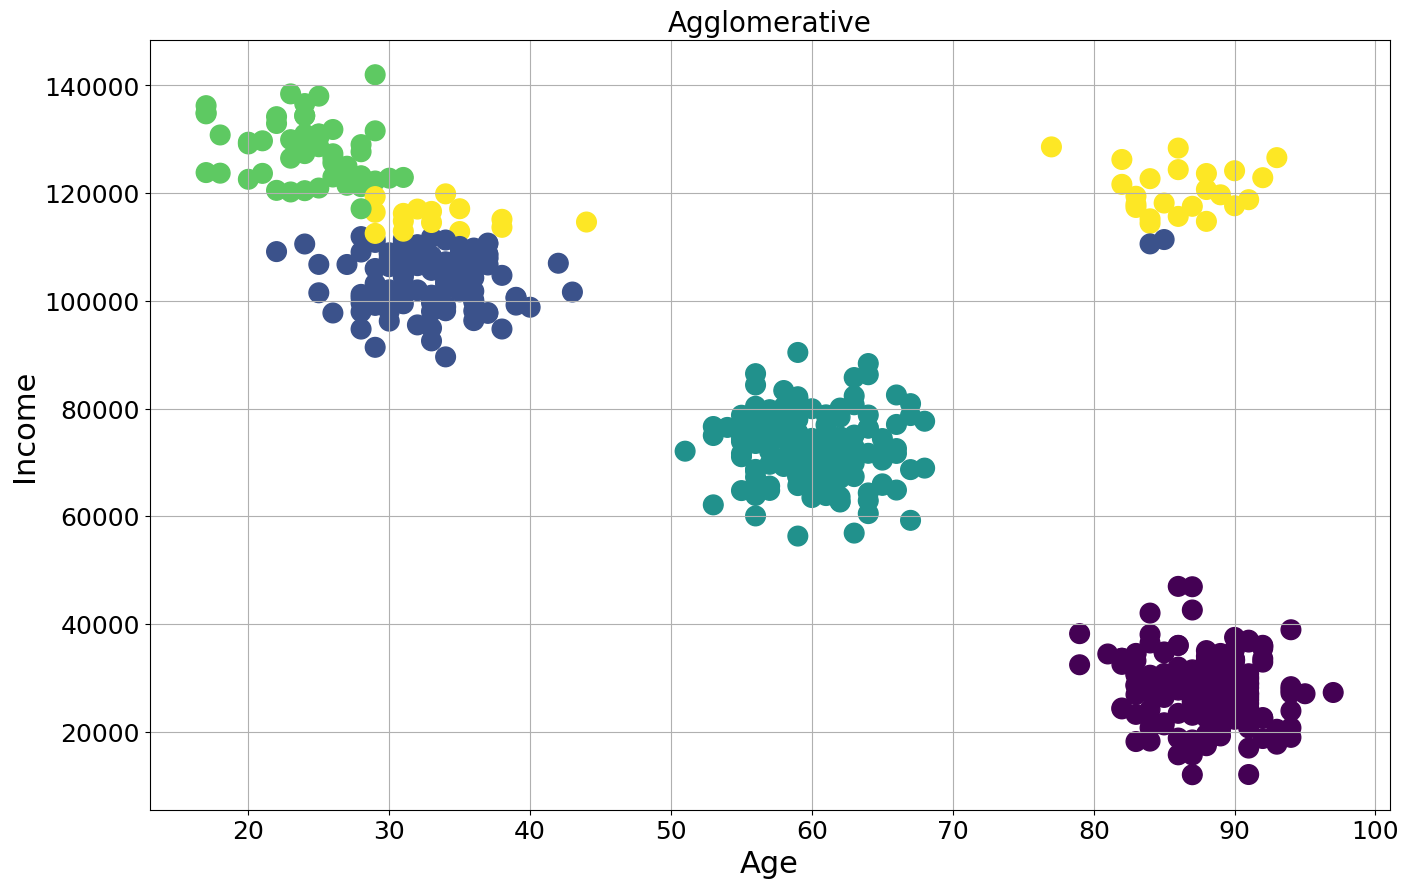

In [51]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(df.iloc[:, 0], df.iloc[:, 1] , s=200, c=agg.labels_);
plt.title("Agglomerative", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.savefig('AirSimClient.write_file-py1.png', transparent=False);

# Find Examplars

In [55]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = df[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


375
Age               84.000000
Income         27384.000000
SpendingScore      0.313647
Savings        16734.672750


Cluster 1:


111
Age               33.000000
Income         99637.000000
SpendingScore      0.228217
Savings        15139.403140


Cluster 2:


467
Age               61.000000
Income         72027.000000
SpendingScore      0.762325
Savings         6926.123598


Cluster 3:


369
Age                34.000000
Income         111303.000000
SpendingScore       0.345313
Savings         14624.318630


Cluster 4:


458
Age                28.000000
Income         127699.000000
SpendingScore       0.881425
Savings          5490.814956

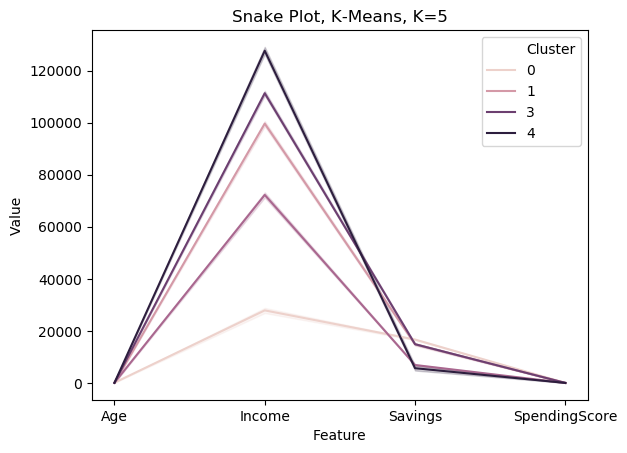